In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 6.8 MB/s eta 0:00:00a 0:00:01m
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.1 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd

# Load the CSV files into DataFrames
appliance_data = pd.read_csv('w1_appliances.csv')
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Merge the DataFrames on 'household_ID', keeping only common IDs
combined_data = pd.merge(appliance_data, non_smart_meter_data, on='household_ID', how='inner')

# Display the combined DataFrame
print(combined_data)

        household_ID appliance_ID               appliance_type  \
0             ID0001         O1_1                 Refrigerator   
1             ID0001         O1_1                 Refrigerator   
2             ID0001         O1_1                 Refrigerator   
3             ID0001         O1_1                 Refrigerator   
4             ID0001         O1_1                 Refrigerator   
...              ...          ...                          ...   
1339970       ID4063        O47_2  Mobile phone - Basic phones   
1339971       ID4063        O47_2  Mobile phone - Basic phones   
1339972       ID4063        O47_2  Mobile phone - Basic phones   
1339973       ID4063        O47_2  Mobile phone - Basic phones   
1339974       ID4063        O47_2  Mobile phone - Basic phones   

         no_of_hours_used_during_last_week       month consumption  
0                                     84.0  2022-10-31         116  
1                                     84.0  2022-11-30         120  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into DataFrames
appliance_data = pd.read_csv('w1_appliances.csv')
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Merge the DataFrames on 'household_ID', keeping only common IDs
combined_data = pd.merge(appliance_data, non_smart_meter_data, on='household_ID', how='inner')

# Convert 'month' to datetime format for better plotting
combined_data['month'] = pd.to_datetime(combined_data['month'])

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for each appliance type
plt.figure(figsize=(15, 10))

# Plotting each appliance type against monthly consumption
for appliance_type in combined_data['appliance_type'].unique():
    plt.figure(figsize=(10, 6))
    subset = combined_data[combined_data['appliance_type'] == appliance_type]
    sns.lineplot(data=subset, x='month', y='consumption', label=appliance_type)
    plt.title(f'Monthly Consumption vs {appliance_type}')
    plt.xlabel('Month')
    plt.ylabel('Consumption')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

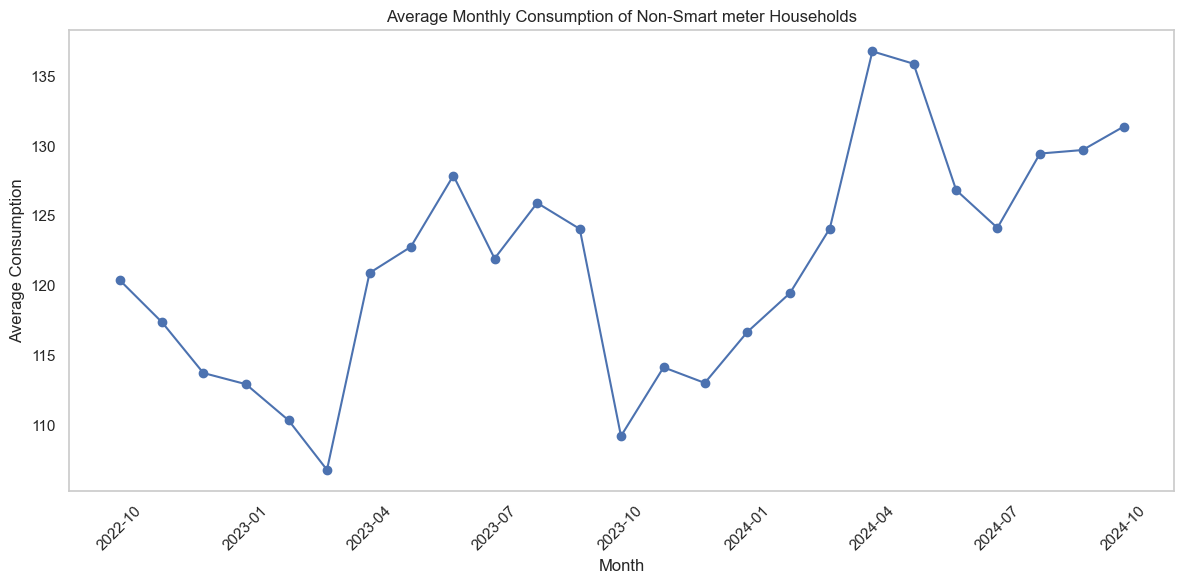

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the non-smart meter data into a DataFrame
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Convert 'month' to datetime format
non_smart_meter_data['month'] = pd.to_datetime(non_smart_meter_data['month'])

# Convert 'consumption' to numeric, forcing errors to NaN
non_smart_meter_data['consumption'] = pd.to_numeric(non_smart_meter_data['consumption'], errors='coerce')

# Drop rows with NaN values in 'consumption'
non_smart_meter_data = non_smart_meter_data.dropna(subset=['consumption'])

# Group by month and calculate the average consumption
average_monthly_consumption = non_smart_meter_data.groupby(non_smart_meter_data['month'].dt.to_period('M'))['consumption'].mean().reset_index()

# Convert period back to datetime for plotting
average_monthly_consumption['month'] = average_monthly_consumption['month'].dt.to_timestamp()

# Plotting the average monthly consumption
plt.figure(figsize=(12, 6))
plt.plot(average_monthly_consumption['month'], average_monthly_consumption['consumption'], marker='o')
plt.title('Average Monthly Consumption of Non-Smart meter Households')
plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

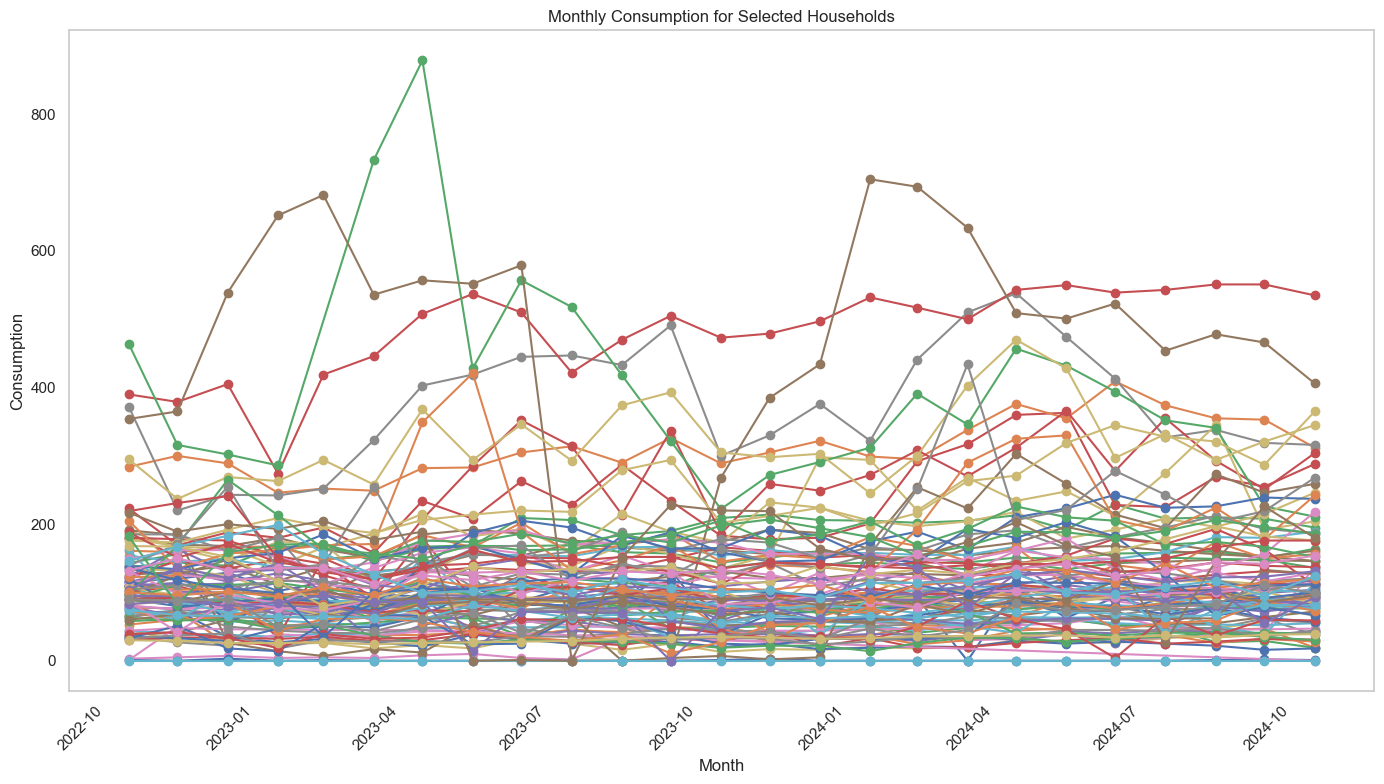

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the non-smart meter data into a DataFrame
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Convert 'month' to datetime format
non_smart_meter_data['month'] = pd.to_datetime(non_smart_meter_data['month'])

# Convert 'consumption' to numeric, forcing errors to NaN
non_smart_meter_data['consumption'] = pd.to_numeric(non_smart_meter_data['consumption'], errors='coerce')

# Drop rows with NaN values in 'consumption'
non_smart_meter_data = non_smart_meter_data.dropna(subset=['consumption'])

# Set the style of the plot
plt.figure(figsize=(14, 8))

# Limit the number of households to plot (e.g., first 10 households)
household_ids_to_plot = non_smart_meter_data['household_ID'].unique()[:100]

# Plotting the monthly consumption for each selected household
for household_id in household_ids_to_plot:
    household_data = non_smart_meter_data[non_smart_meter_data['household_ID'] == household_id]
    plt.plot(household_data['month'], household_data['consumption'], marker='o', label=household_id)

# Adding titles and labels
plt.title('Monthly Consumption for Selected Households')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.xticks(rotation=45)
# plt.legend(title='Household ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the non-smart meter data into a DataFrame
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Convert 'month' to datetime format
non_smart_meter_data['month'] = pd.to_datetime(non_smart_meter_data['month'])

# Convert 'consumption' to numeric, forcing errors to NaN
non_smart_meter_data['consumption'] = pd.to_numeric(non_smart_meter_data['consumption'], errors='coerce')

# Drop rows with NaN values in 'consumption'
non_smart_meter_data = non_smart_meter_data.dropna(subset=['consumption'])

# Get unique household IDs
household_ids = non_smart_meter_data['household_ID'].unique()

# Set the number of households per plot
households_per_plot = 100

# Create plots for each chunk of households
for i in range(0, len(household_ids), households_per_plot):
    plt.figure(figsize=(14, 8))
    
    # Get the current chunk of household IDs
    current_household_ids = household_ids[i:i + households_per_plot]
    
    # Plotting the monthly consumption for each household in the current chunk
    for household_id in current_household_ids:
        household_data = non_smart_meter_data[non_smart_meter_data['household_ID'] == household_id]
        plt.plot(household_data['month'], household_data['consumption'], marker='o', label=household_id)

    # Adding titles and labels
    plt.title(f'Monthly Consumption for Households {i + 1} to {min(i + households_per_plot, len(household_ids))}')
    plt.xlabel('Month')
    plt.ylabel('Consumption')
    plt.xticks(rotation=45)
    # plt.legend(title='Household ID', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()

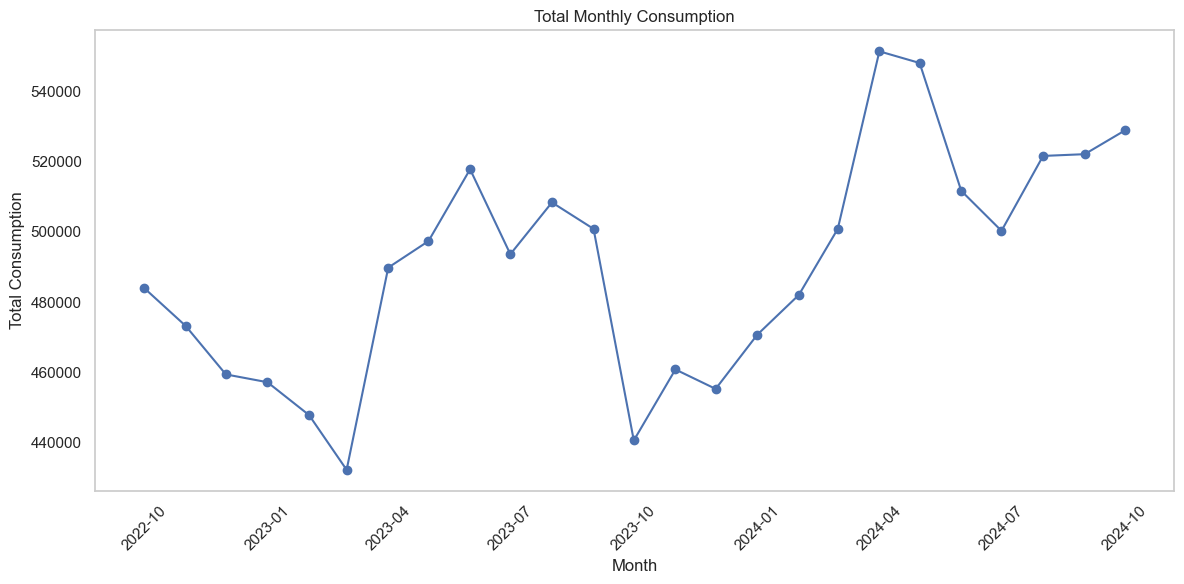

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the non-smart meter data into a DataFrame
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Convert 'month' to datetime format
non_smart_meter_data['month'] = pd.to_datetime(non_smart_meter_data['month'])

# Convert 'consumption' to numeric, forcing errors to NaN
non_smart_meter_data['consumption'] = pd.to_numeric(non_smart_meter_data['consumption'], errors='coerce')

# Drop rows with NaN values in 'consumption'
non_smart_meter_data = non_smart_meter_data.dropna(subset=['consumption'])

# Group by month and calculate the total consumption
total_monthly_consumption = non_smart_meter_data.groupby(non_smart_meter_data['month'].dt.to_period('M'))['consumption'].sum().reset_index()

# Convert period back to datetime for plotting
total_monthly_consumption['month'] = total_monthly_consumption['month'].dt.to_timestamp()

# Plotting the total monthly consumption
plt.figure(figsize=(12, 6))
plt.plot(total_monthly_consumption['month'], total_monthly_consumption['consumption'], marker='o', color='b')
plt.title('Total Monthly Consumption')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

                                       appliance_type  count
0                         Mobile phone - Smart phones   7976
1                                        Refrigerator   3545
2         Electric Iron including electric steam iron   3535
3                                                  TV   3402
4                                         Rice cooker   3223
..                                                ...    ...
72  Electric vehicles (two wheelers) - Electric bi...     12
73                                           Mini Bar     10
74                                        Dish washer     10
75                                         Humidifier      8
76                 Electric vehicles (three wheelers)      2

[77 rows x 2 columns]


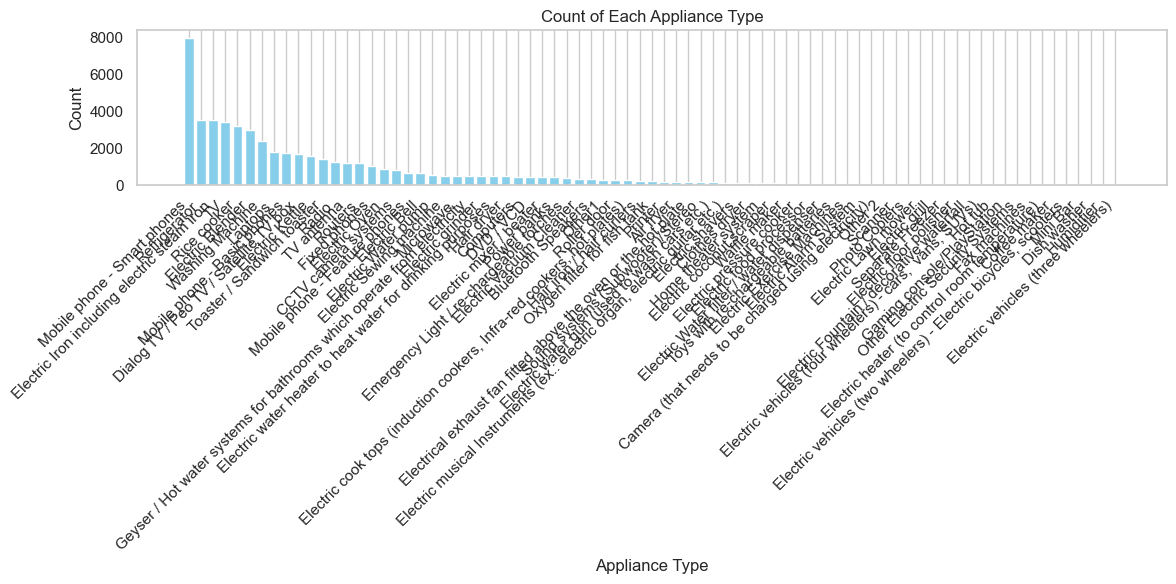

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the appliances data into a DataFrame
appliance_data = pd.read_csv('w1_appliances.csv')

# Count the occurrences of each appliance type
appliance_counts = appliance_data['appliance_type'].value_counts().reset_index()
appliance_counts.columns = ['appliance_type', 'count']

# Display the counts
print(appliance_counts)

# Plotting the counts of each appliance type
plt.figure(figsize=(12, 6))
plt.bar(appliance_counts['appliance_type'], appliance_counts['count'], color='skyblue')
plt.title('Count of Each Appliance Type')
plt.xlabel('Appliance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

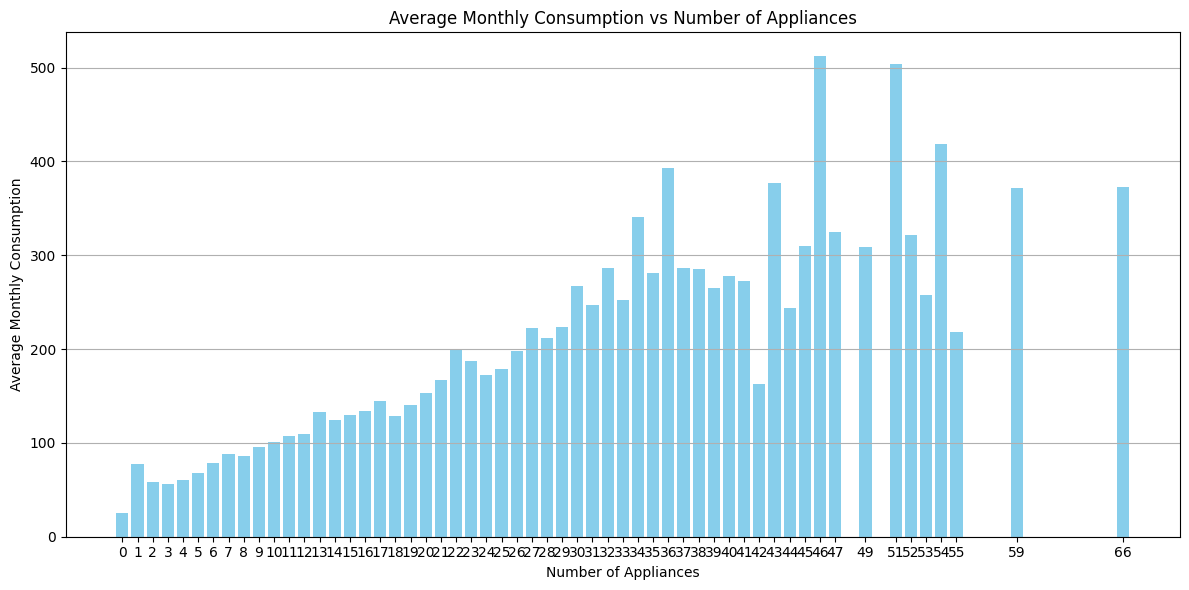

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the non-smart meter data into a DataFrame
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Load the appliances data into a DataFrame
appliance_data = pd.read_csv('w1_appliances.csv')

# Convert 'month' to datetime format
non_smart_meter_data['month'] = pd.to_datetime(non_smart_meter_data['month'])

# Convert 'consumption' to numeric, forcing errors to NaN
non_smart_meter_data['consumption'] = pd.to_numeric(non_smart_meter_data['consumption'], errors='coerce')

# Count the number of each appliance per household
appliance_counts = appliance_data.groupby('household_ID')['appliance_ID'].count().reset_index()
appliance_counts.columns = ['household_ID', 'appliance_count']

# Merge the appliance counts with the non-smart meter data
merged_data = pd.merge(non_smart_meter_data, appliance_counts, on='household_ID', how='left')

# Fill NaN values in 'appliance_count' with 0 (for households without any appliances)
merged_data['appliance_count'] = merged_data['appliance_count'].fillna(0).astype(int)

# Drop rows with NaN values in 'consumption' after conversion
merged_data = merged_data.dropna(subset=['consumption'])

# Group by appliance count and calculate average consumption
average_consumption = merged_data.groupby('appliance_count')['consumption'].mean().reset_index()

# Plotting the average monthly consumption vs number of appliances
plt.figure(figsize=(12, 6))
plt.bar(average_consumption['appliance_count'], average_consumption['consumption'], color='skyblue')
plt.title('Average Monthly Consumption vs Number of Appliances')
plt.xlabel('Number of Appliances')
plt.ylabel('Average Monthly Consumption')
plt.xticks(average_consumption['appliance_count'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

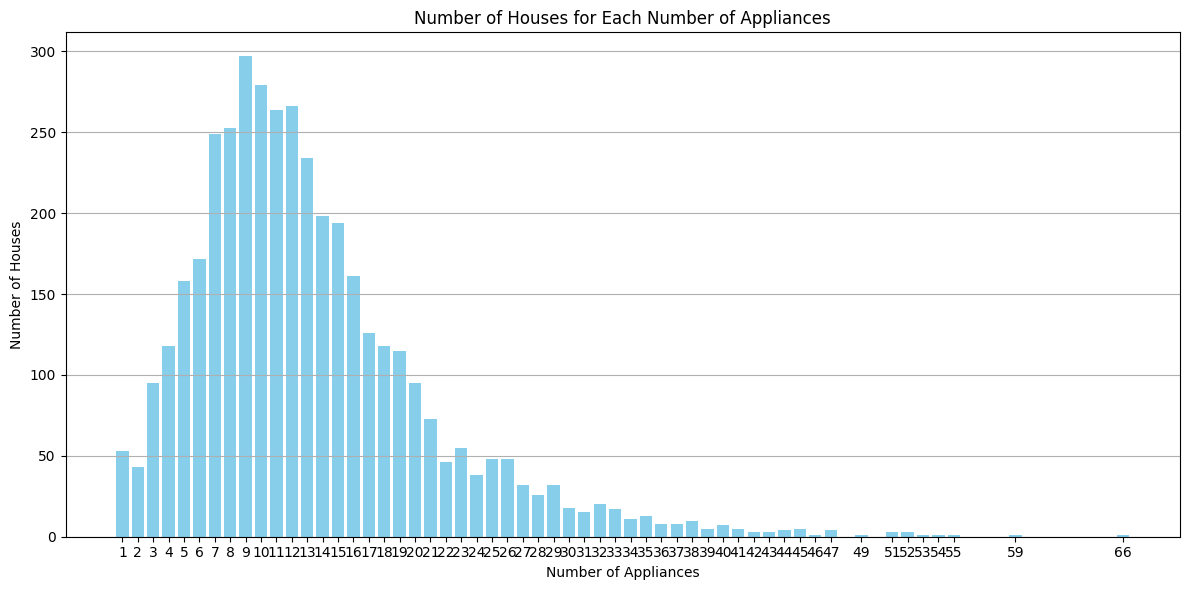

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the appliances data into a DataFrame
appliance_data = pd.read_csv('w1_appliances.csv')

# Count the number of each appliance per household
appliance_counts = appliance_data.groupby('household_ID')['appliance_ID'].count().reset_index()
appliance_counts.columns = ['household_ID', 'appliance_count']

# Count the number of households for each appliance count
household_counts = appliance_counts['appliance_count'].value_counts().sort_index().reset_index()
household_counts.columns = ['appliance_count', 'number_of_houses']

# Plotting the number of houses for each number of appliances
plt.figure(figsize=(12, 6))
plt.bar(household_counts['appliance_count'], household_counts['number_of_houses'], color='skyblue')
plt.title('Number of Houses for Each Number of Appliances')
plt.xlabel('Number of Appliances')
plt.ylabel('Number of Houses')
plt.xticks(household_counts['appliance_count'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# Load the non-smart meter data into a DataFrame
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Load the appliances data into a DataFrame
appliance_data = pd.read_csv('w1_appliances.csv')

# Count the number of each appliance per household
appliance_counts = appliance_data.groupby(['household_ID', 'appliance_type']).size().reset_index(name='appliance_count')

# Pivot the appliance counts to create separate columns for each appliance type
pivoted_appliance_counts = appliance_counts.pivot(index='household_ID', columns='appliance_type', values='appliance_count').fillna(0)

# Reset the index to turn the household_ID back into a column
pivoted_appliance_counts.reset_index(inplace=True)

# Merge the pivoted appliance counts with the non-smart meter data
merged_data = pd.merge(non_smart_meter_data, pivoted_appliance_counts, on='household_ID', how='left')

# Fill NaN values with 0 for households without the respective appliances
merged_data = merged_data.fillna(0)

# Display the resulting dataset
print(merged_data)

# Optionally, save the resulting dataset to a new CSV file
merged_data.to_csv('merged_non_smart_meter_data_with_appliance_counts.csv', index=False)

       household_ID       month consumption  Air fryer  Bluetooth Speakers  \
0            ID0001  2022-10-31         116        0.0                 0.0   
1            ID0001  2022-11-30         120        0.0                 0.0   
2            ID0001  2022-12-31         129        0.0                 0.0   
3            ID0001  2023-01-31         102        0.0                 0.0   
4            ID0001  2023-02-28         115        0.0                 0.0   
...             ...         ...         ...        ...                 ...   
101570       ID4063  2024-06-30         167        0.0                 0.0   
101571       ID4063  2024-07-31         178        0.0                 0.0   
101572       ID4063  2024-08-31         165        0.0                 0.0   
101573       ID4063  2024-09-30         124        0.0                 0.0   
101574       ID4063  2024-10-31         109        0.0                 0.0   

        CCTV camera systems  \
0                       0.0   
1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('merged_non_smart_meter_data_with_appliance_counts.csv')

# Convert 'consumption' to numeric, forcing errors to NaN
data['consumption'] = pd.to_numeric(data['consumption'], errors='coerce')

# Get appliance columns (assuming the first three columns are household_ID, month, and consumption)
appliance_columns = data.columns[3:]

# Create a figure for each appliance
for appliance in appliance_columns:
    # Convert the appliance column to numeric, forcing errors to NaN
    data[appliance] = pd.to_numeric(data[appliance], errors='coerce')

    # Drop rows where either consumption or the appliance count is NaN
    avg_consumption = data.dropna(subset=['consumption', appliance]).groupby(appliance)['consumption'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(avg_consumption[appliance], avg_consumption['consumption'], marker='o')
    plt.title(f'Average Power Consumption vs Number of {appliance}')
    plt.xlabel(f'Number of {appliance}')
    plt.ylabel('Average Power Consumption (kWh)')
    plt.grid()
    plt.xticks(range(int(avg_consumption[appliance].min()), int(avg_consumption[appliance].max()) + 1))
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('merged_non_smart_meter_data_with_appliance_counts.csv')

# Convert 'consumption' to numeric, forcing errors to NaN
data['consumption'] = pd.to_numeric(data['consumption'], errors='coerce')

# Get appliance columns (assuming the first three columns are household_ID, month, and consumption)
appliance_columns = data.columns[3:]

# Create a figure for each appliance
for appliance in appliance_columns:
    # Convert the appliance column to numeric, forcing errors to NaN
    data[appliance] = pd.to_numeric(data[appliance], errors='coerce')

    # Drop rows where either consumption or the appliance count is NaN
    avg_consumption = data.dropna(subset=['consumption', appliance]).groupby(appliance)['consumption'].mean().reset_index()

    # Count the number of households for each appliance count
    house_count = data.dropna(subset=['consumption', appliance]).groupby(appliance).size().reset_index(name='house_count')

    # Merge average consumption with house count
    avg_consumption = pd.merge(avg_consumption, house_count, on=appliance)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(avg_consumption[appliance], avg_consumption['consumption'], 
                s=avg_consumption['house_count'] * 10,  # Scale the size for better visibility
                alpha=0.6, edgecolors="w", marker='o')
    plt.title(f'Average Power Consumption vs Number of {appliance}')
    plt.xlabel(f'Number of {appliance}')
    plt.ylabel('Average Power Consumption (kWh)')
    plt.grid()
    plt.xticks(range(int(avg_consumption[appliance].min()), int(avg_consumption[appliance].max()) + 1))
    
    # Show the plot
    plt.tight_layout()
    plt.show()

/var/folders/rd/llyjsxkn17n7z1g07bvbtldh0000gq/T/ipykernel_33888/2707291465.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('merged_non_smart_meter_data_with_appliance_counts.csv')


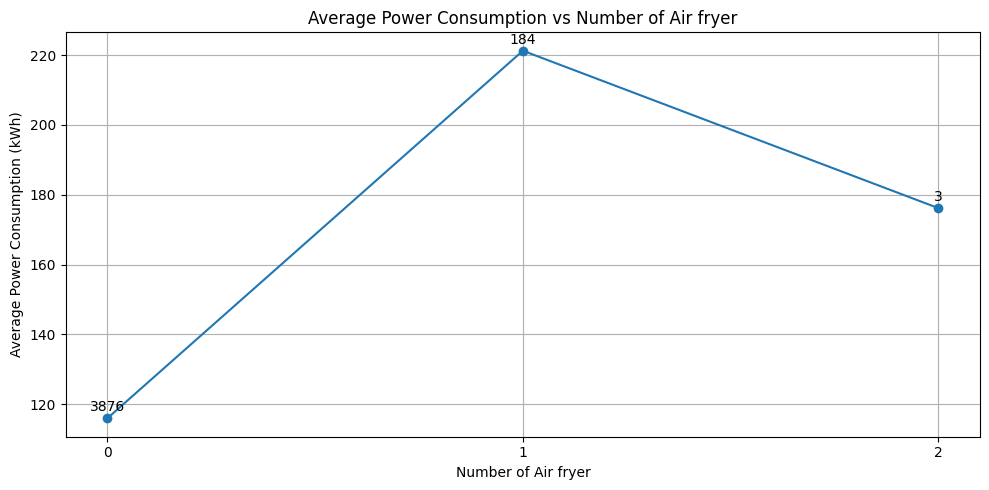

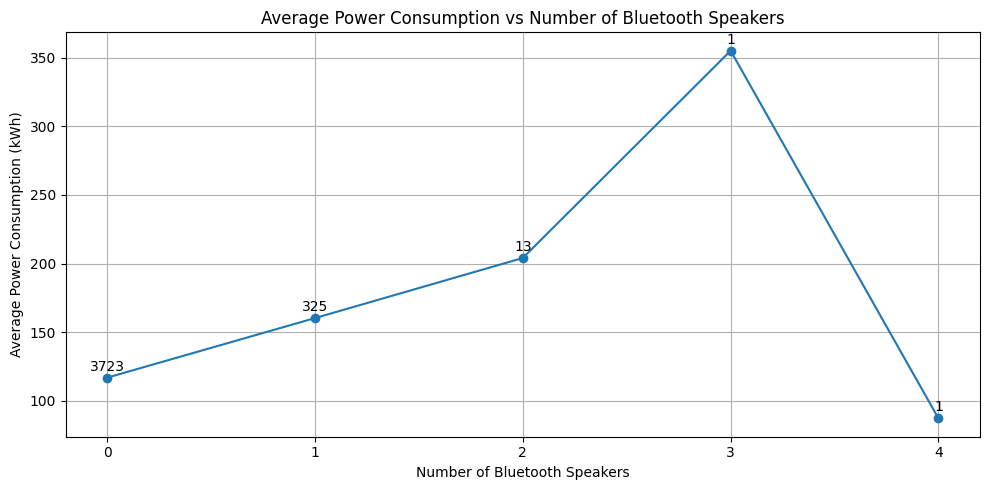

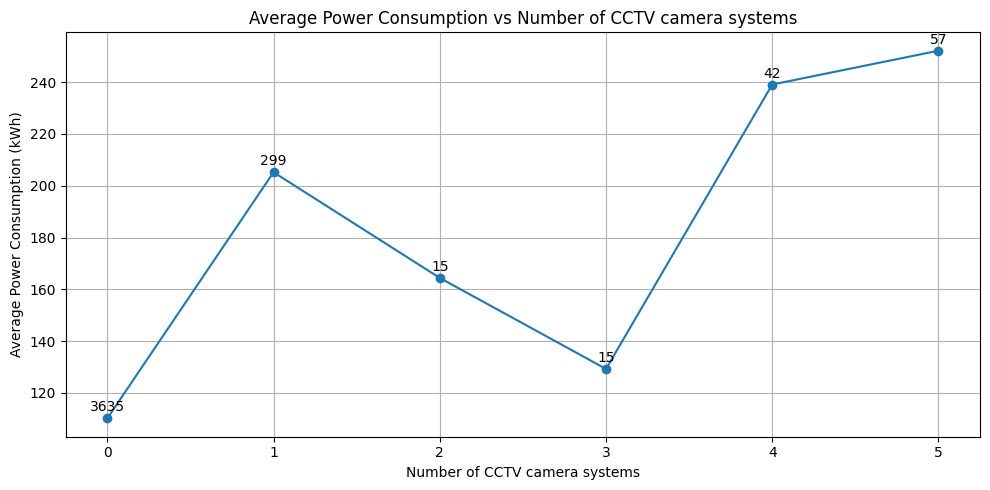

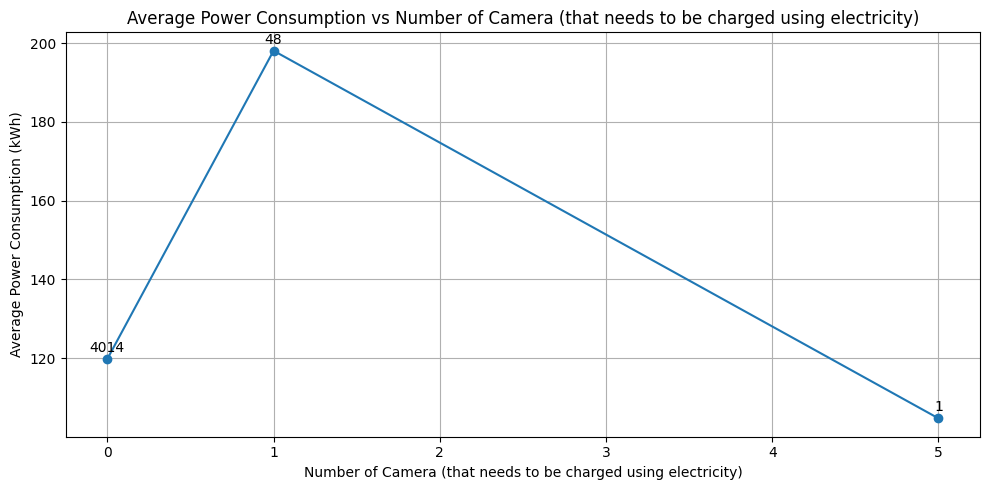

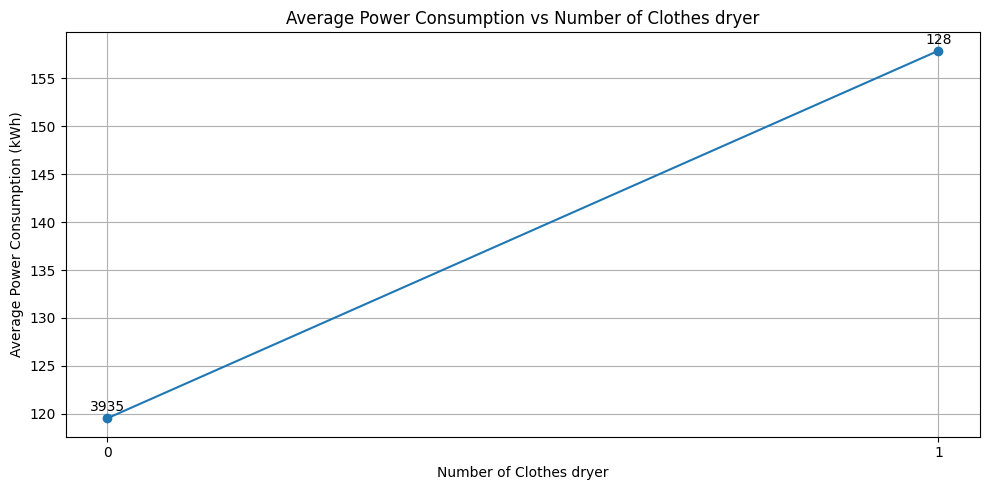

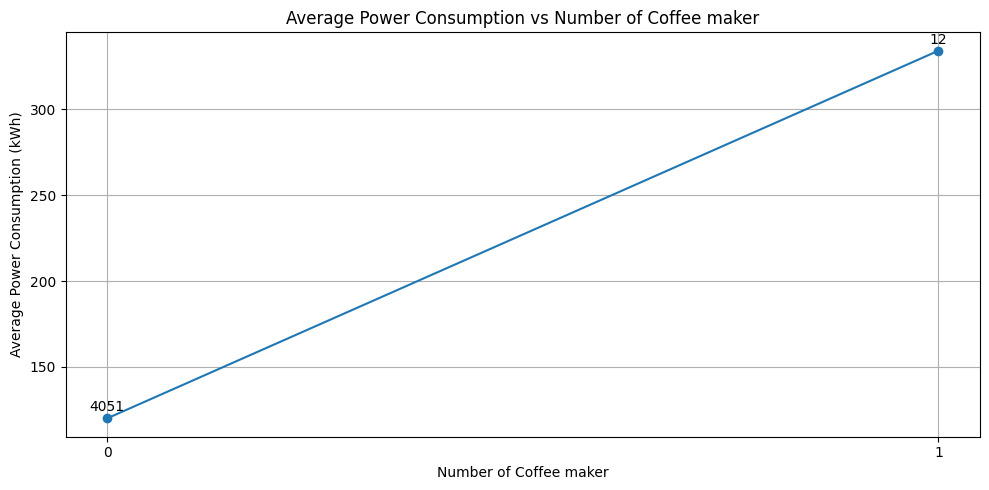

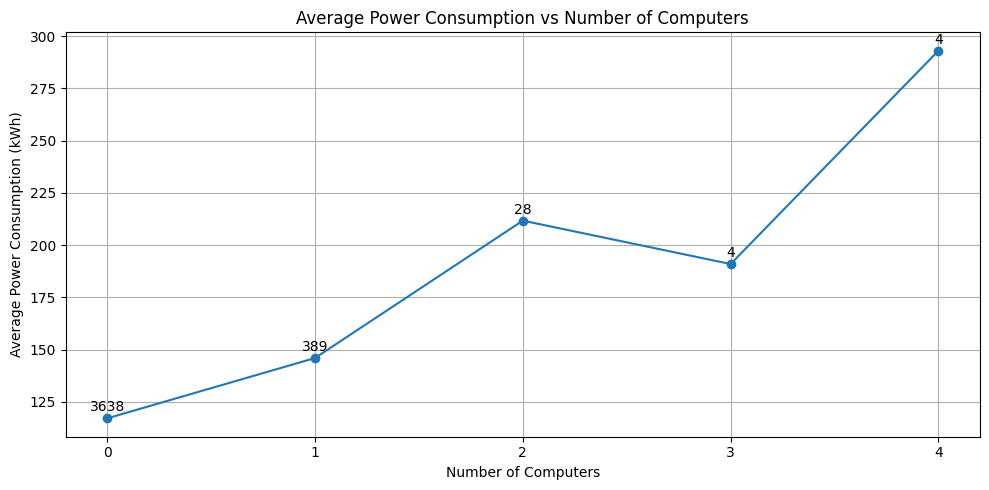

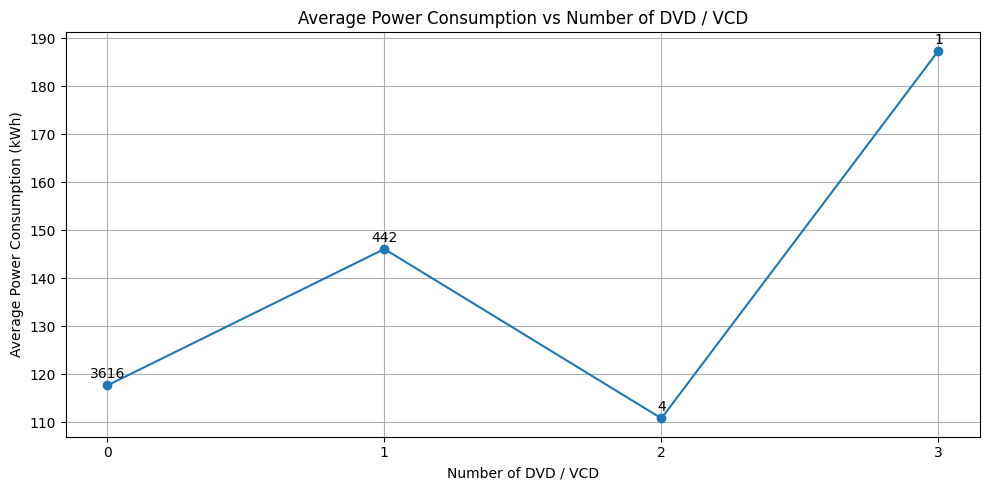

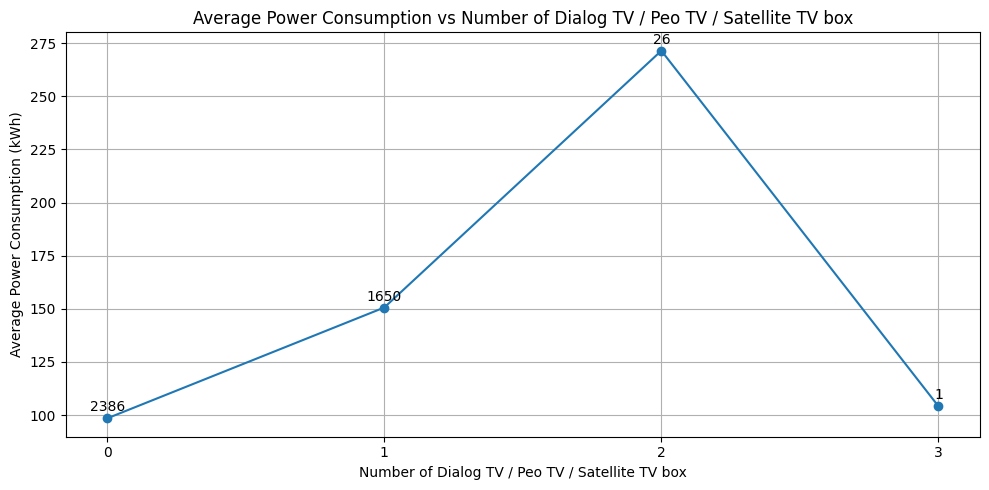

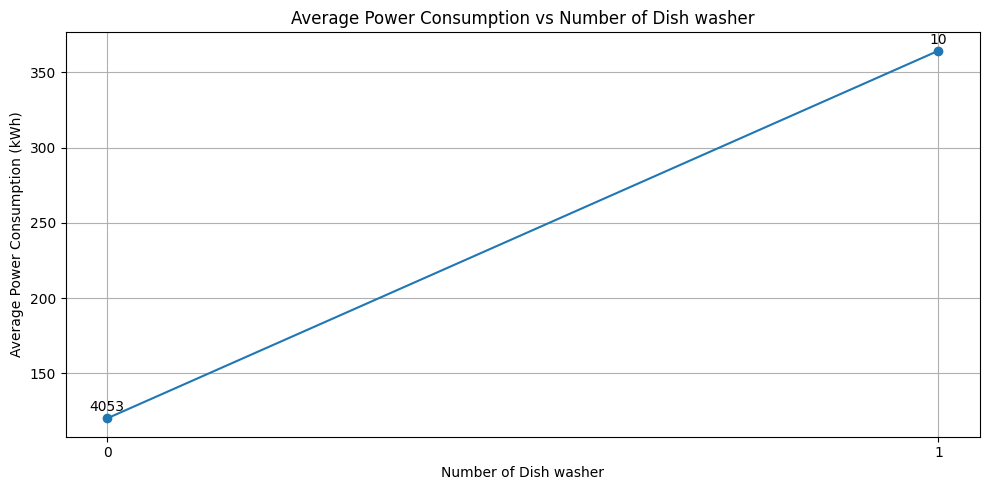

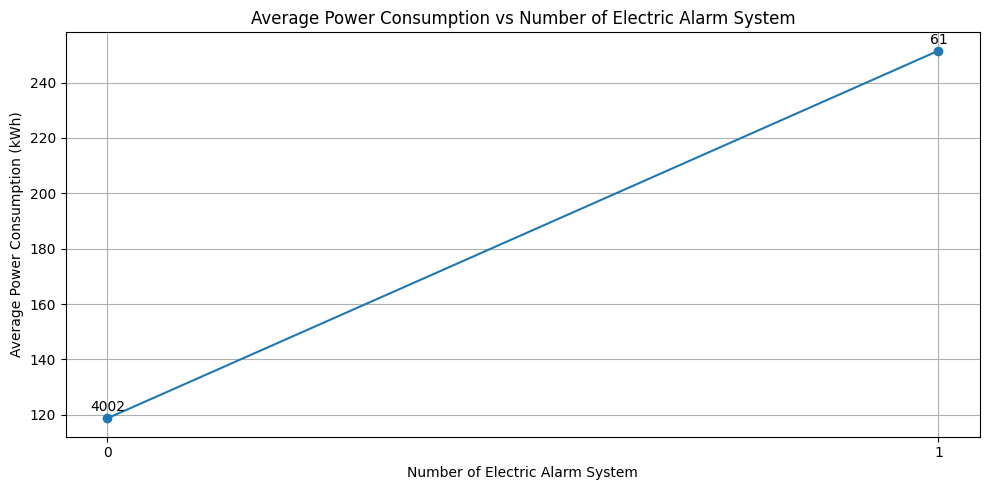

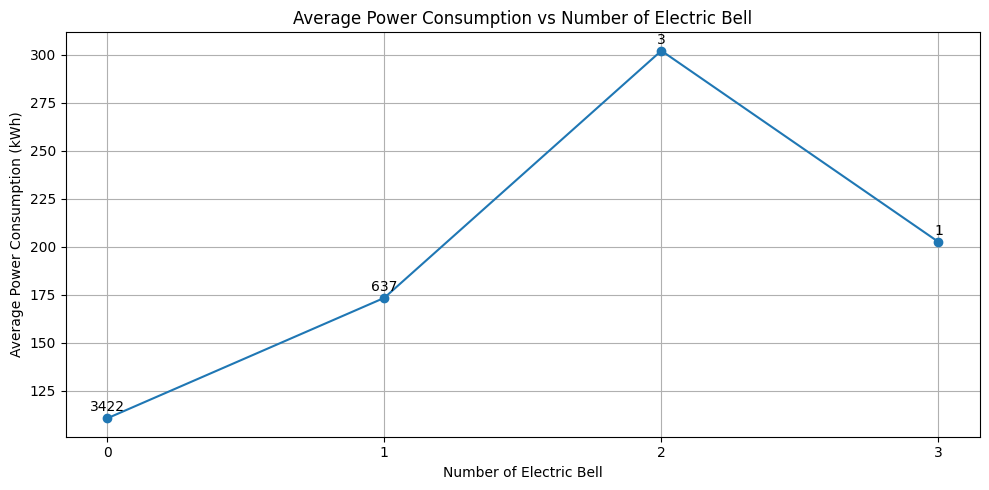

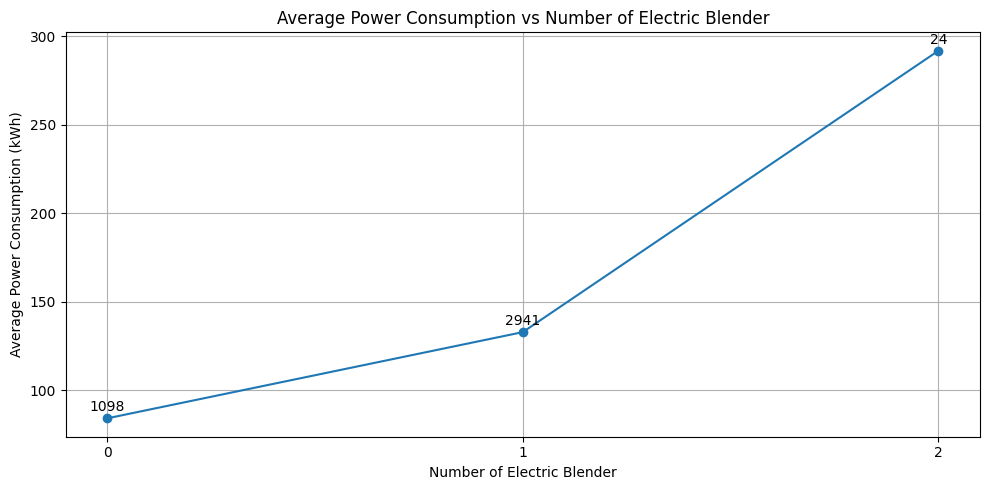

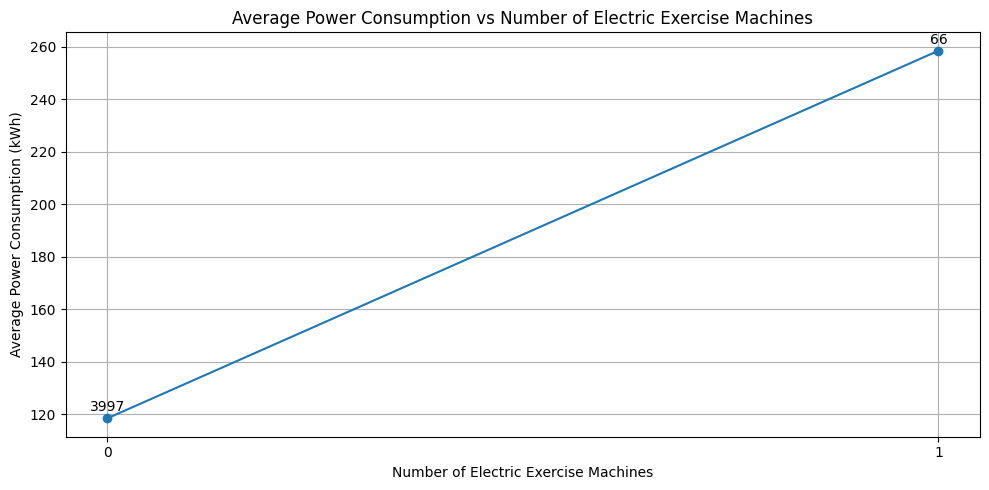

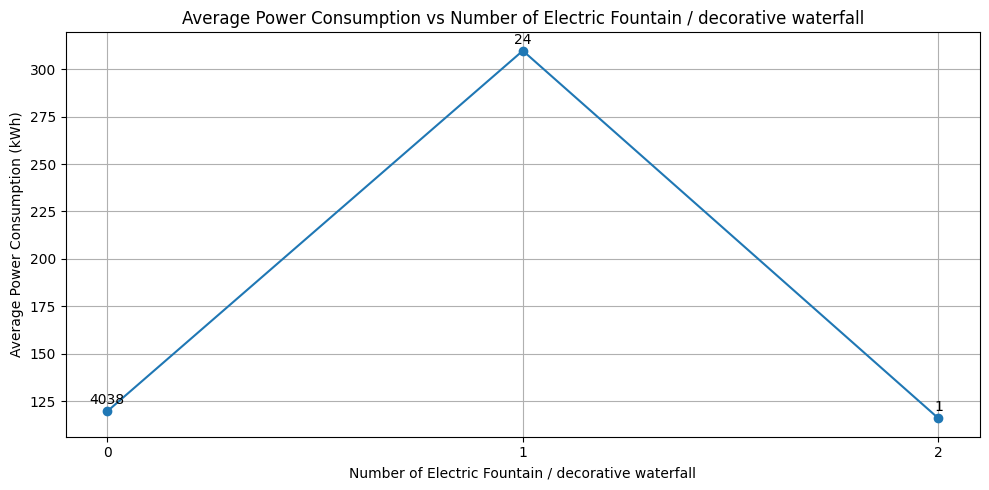

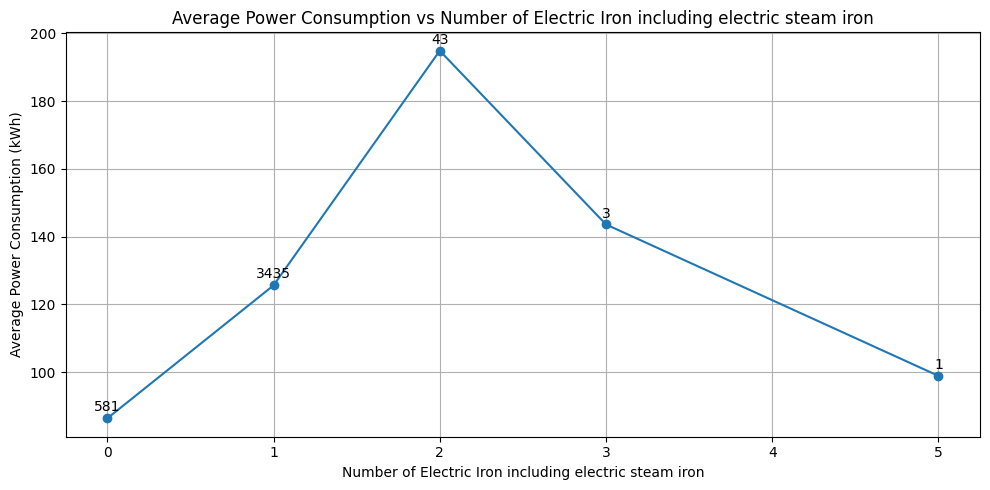

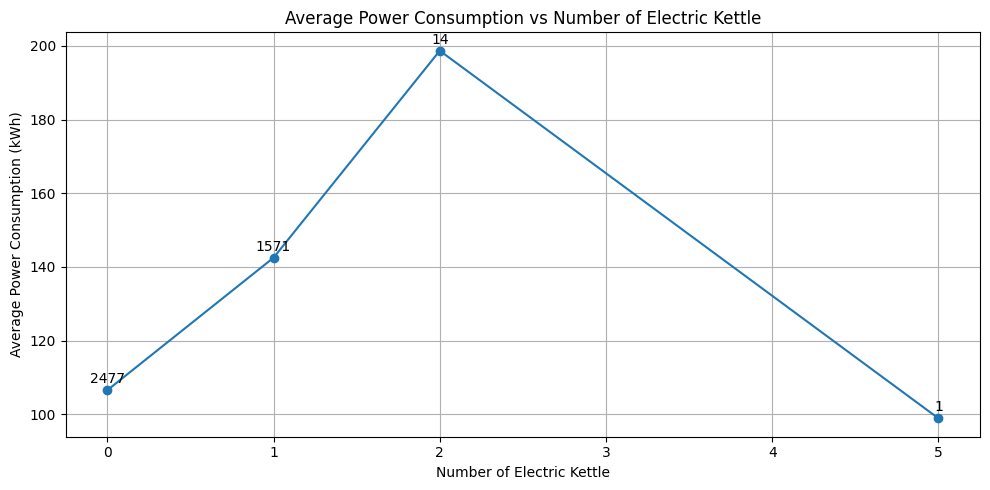

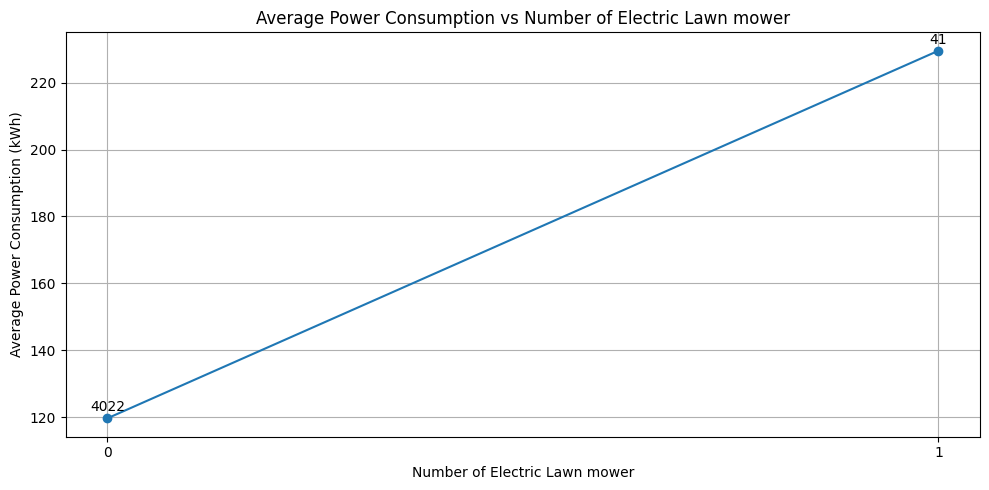

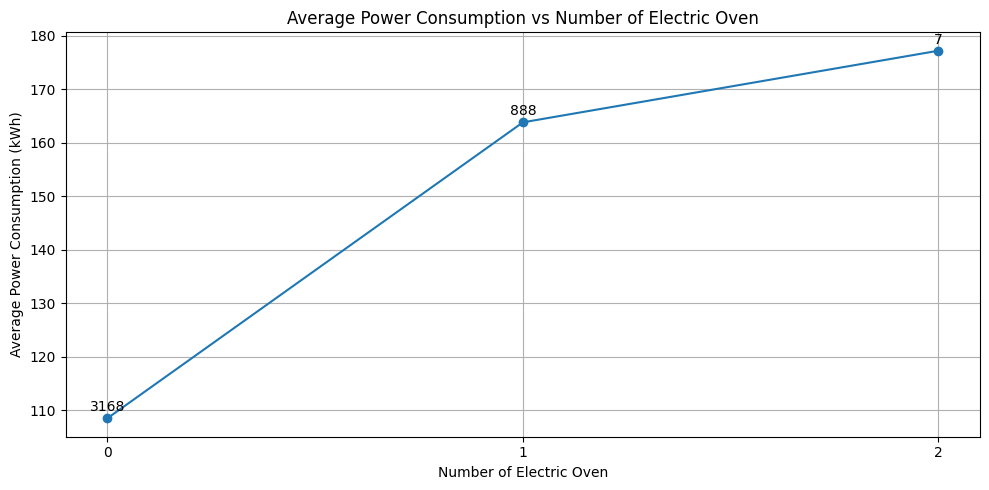

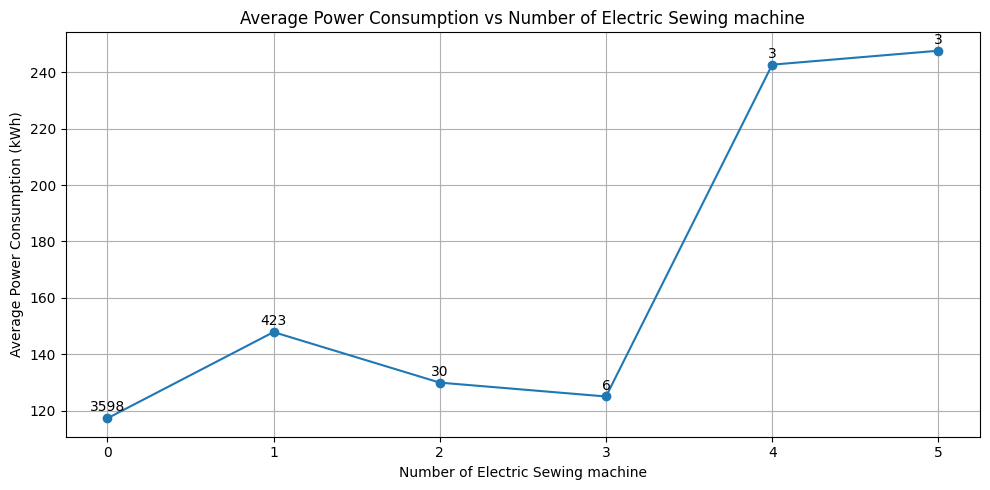

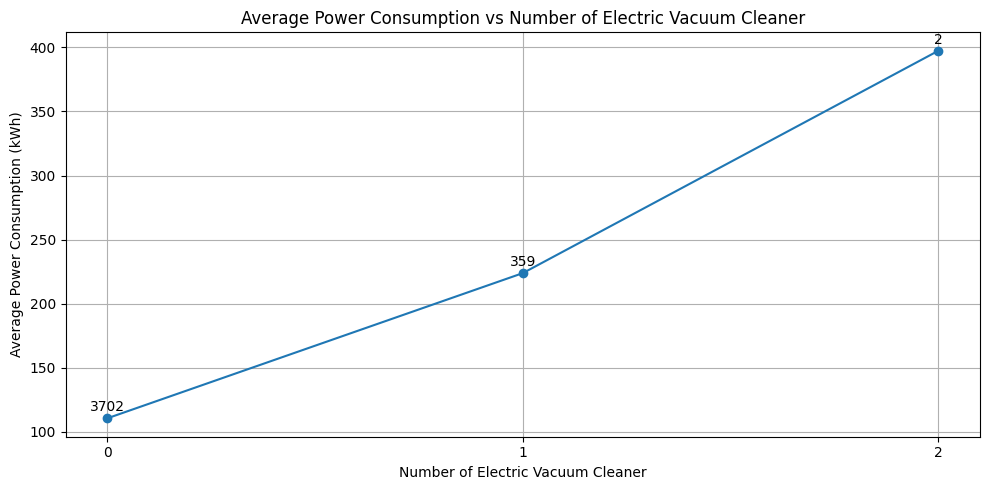

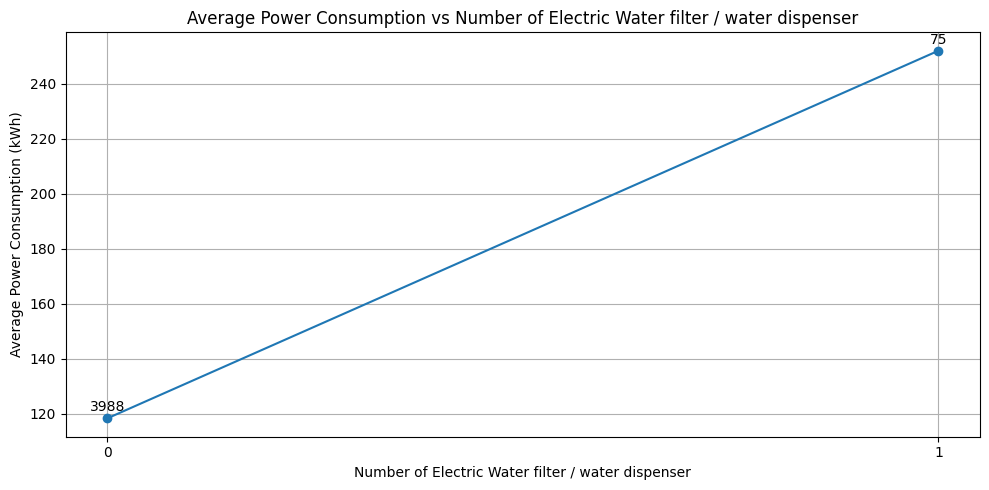

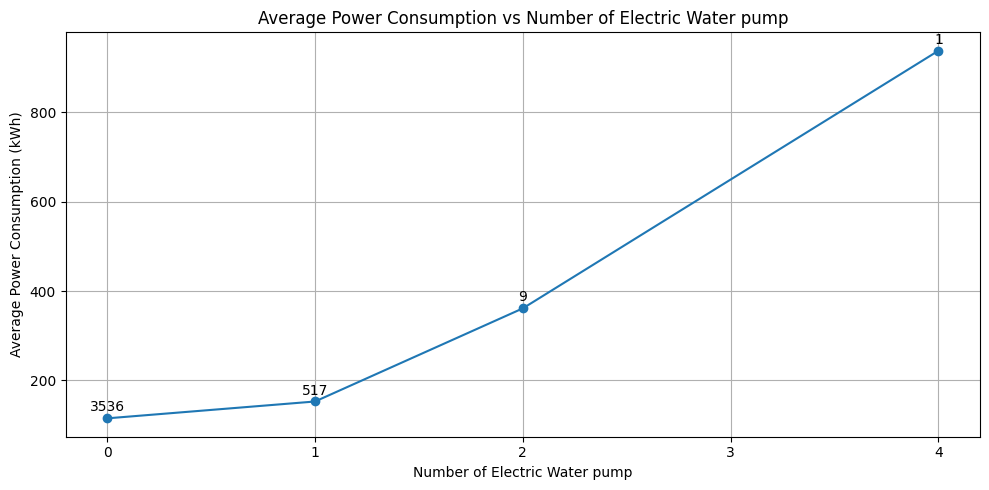

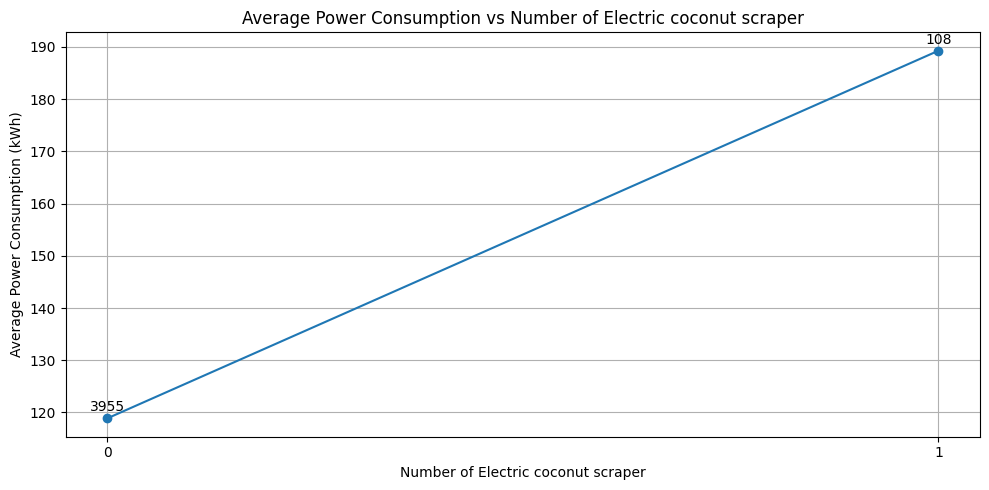

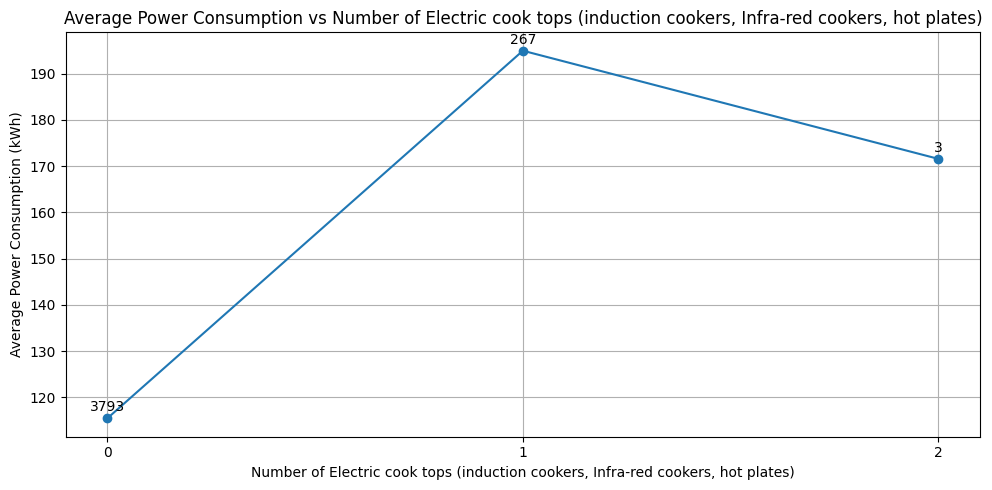

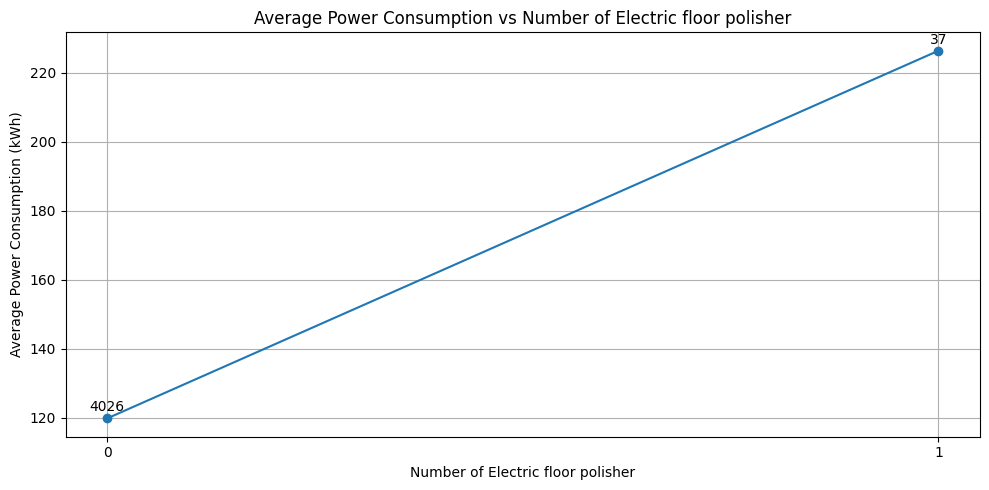

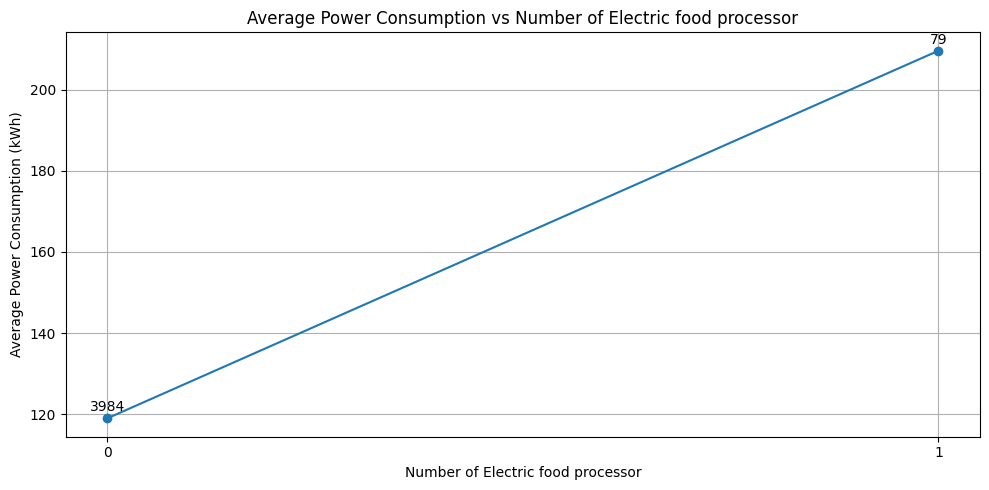

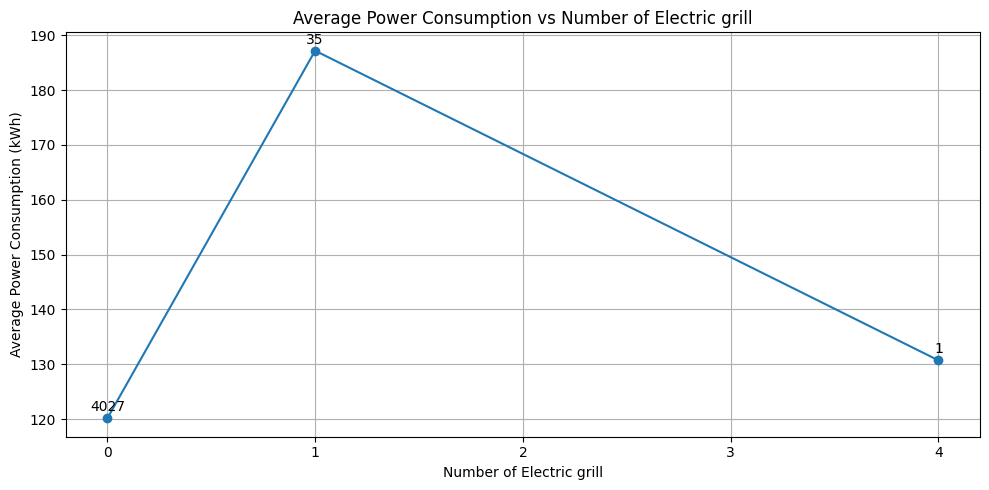

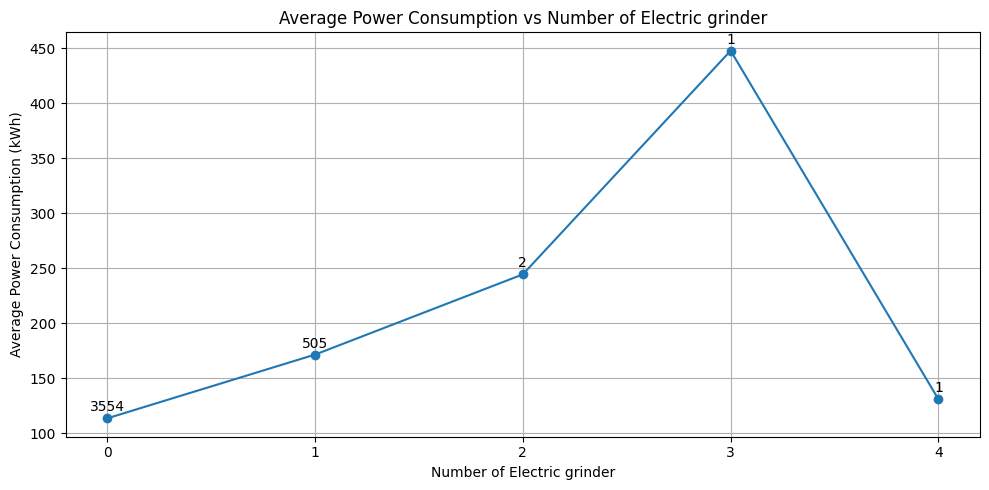

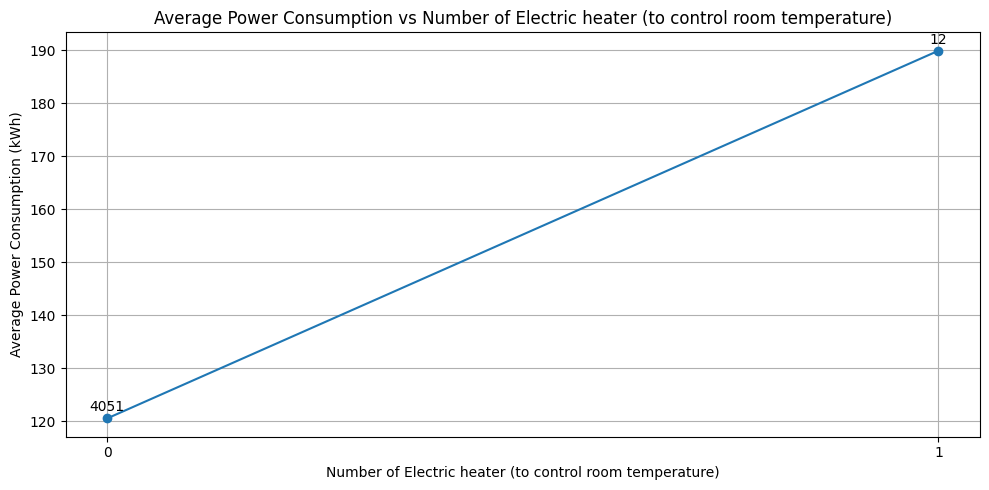

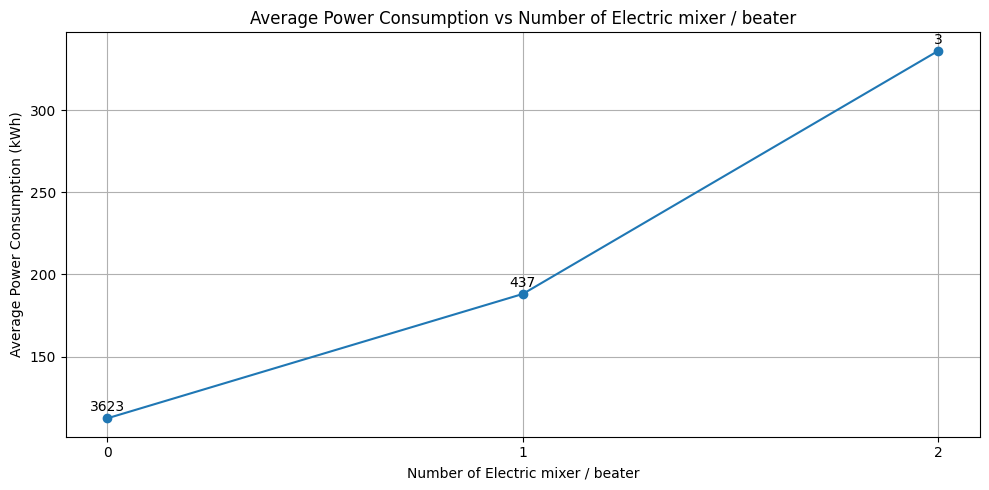

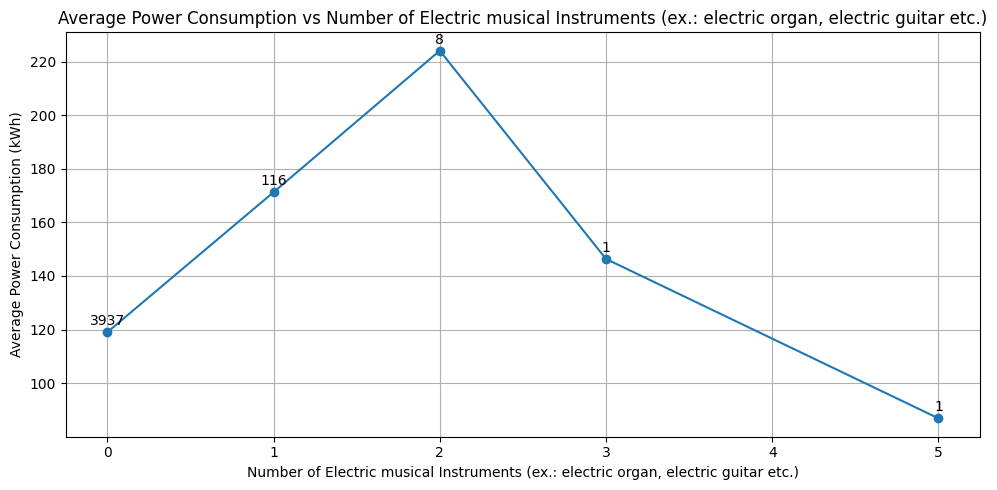

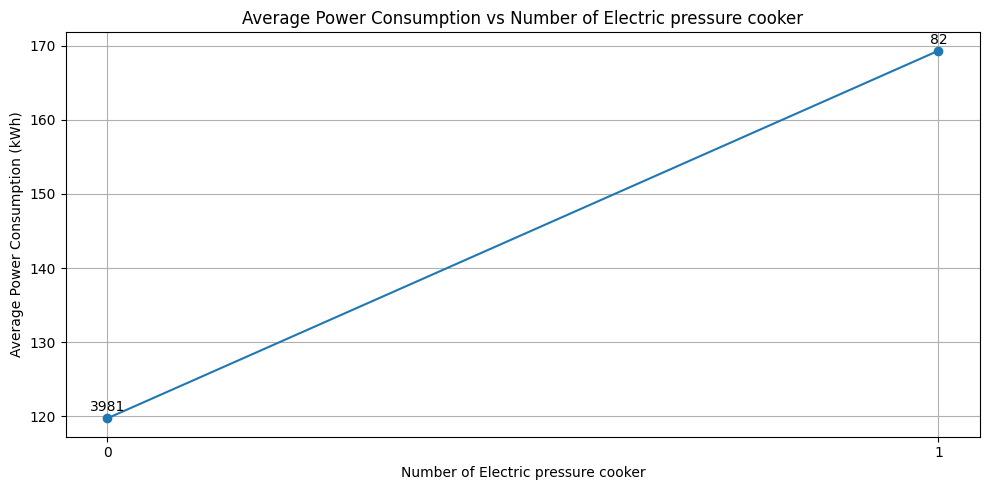

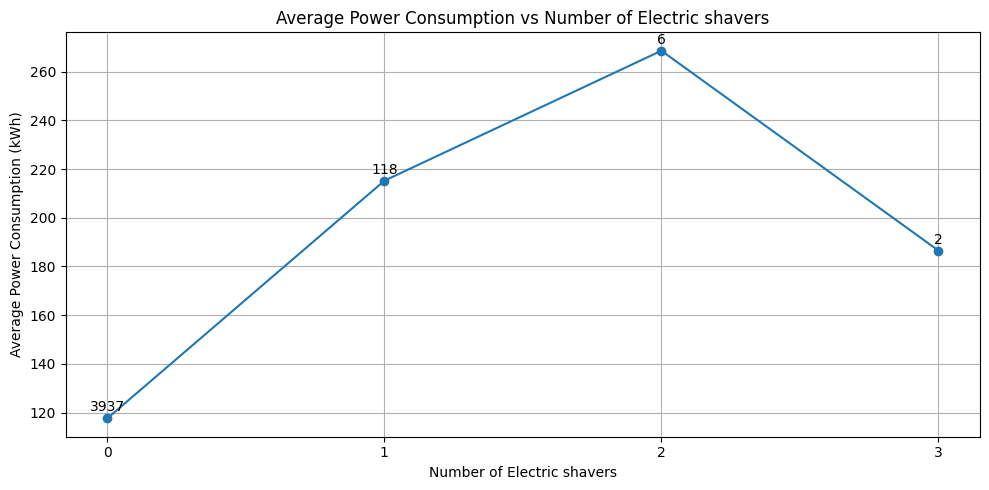

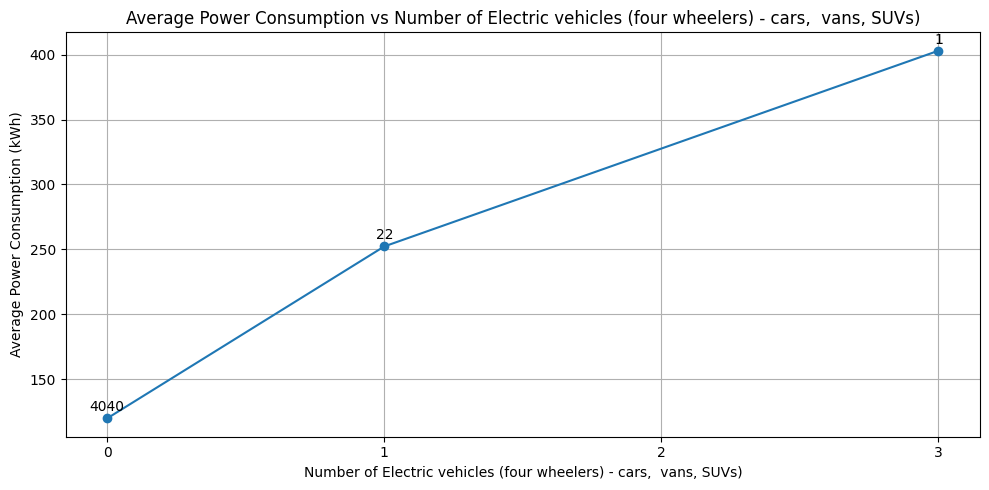

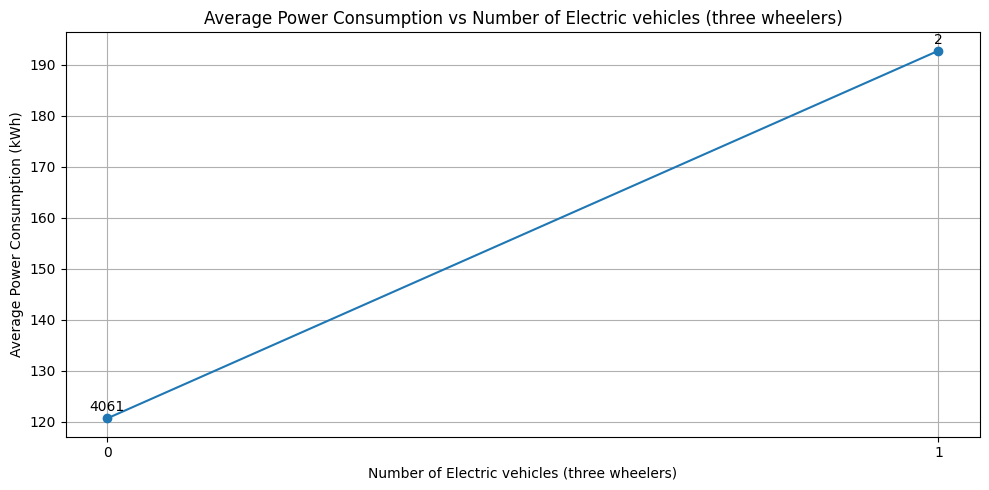

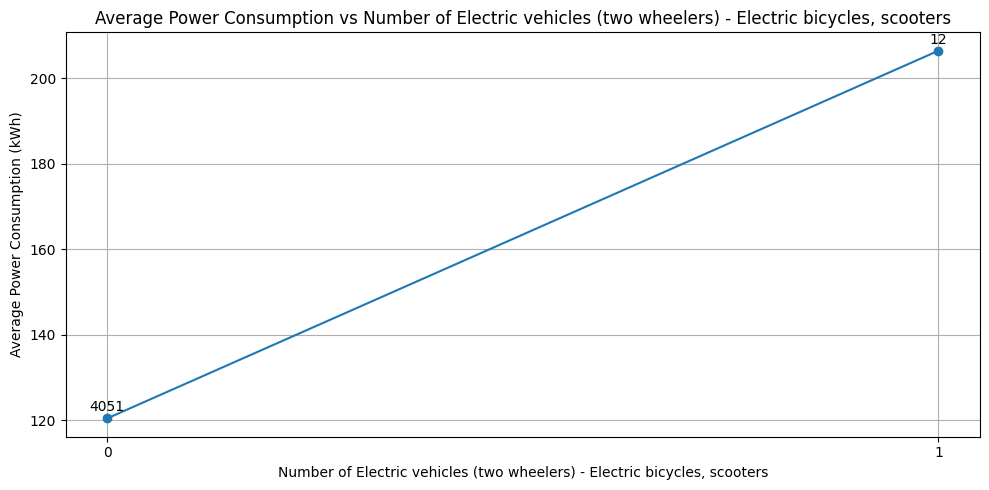

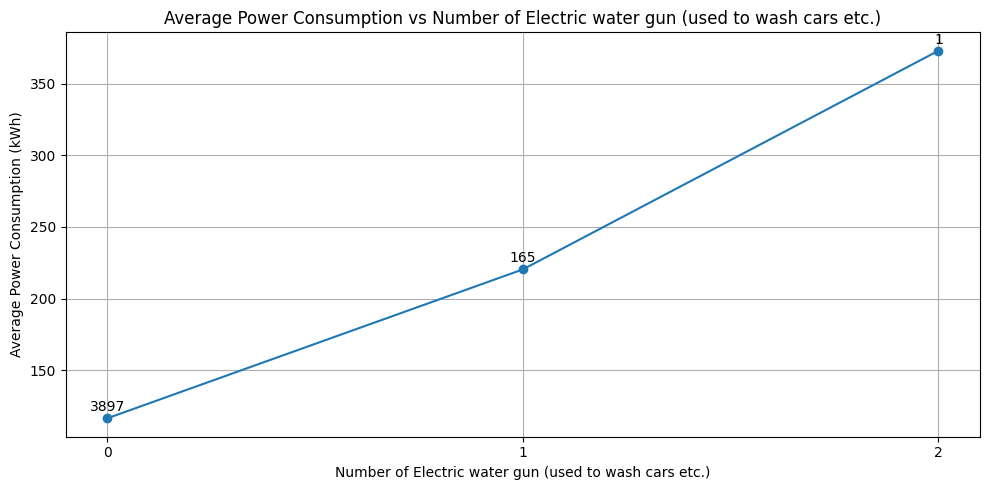

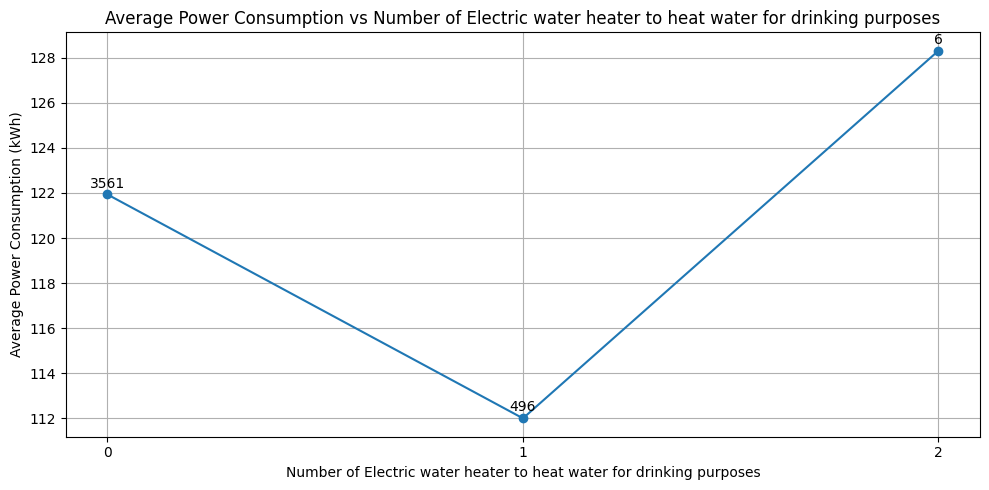

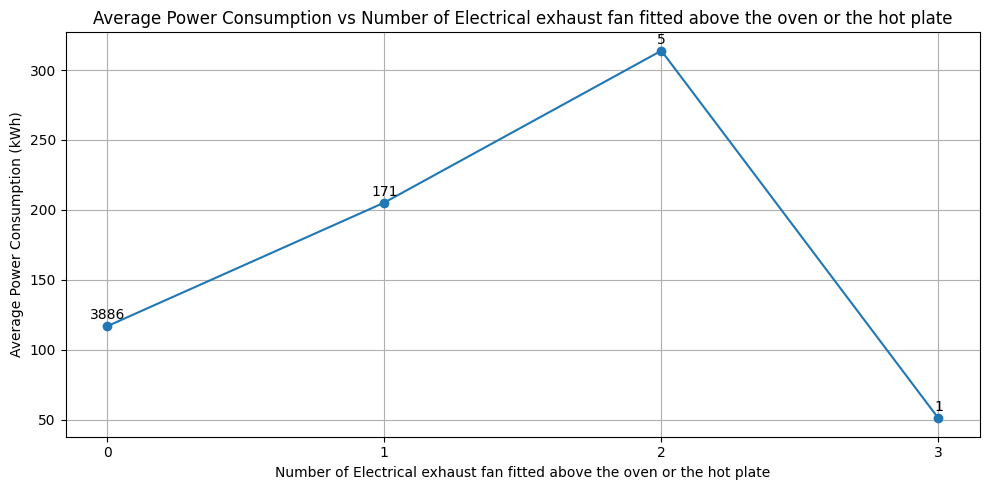

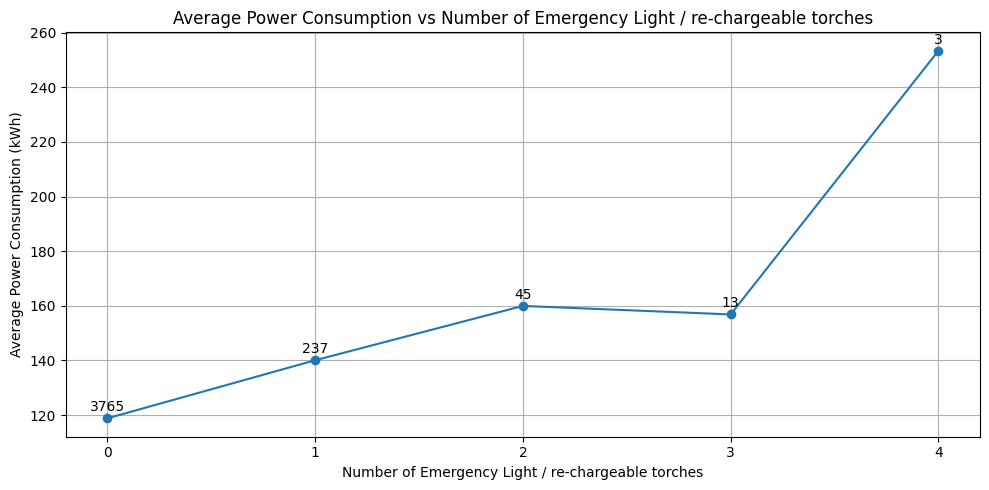

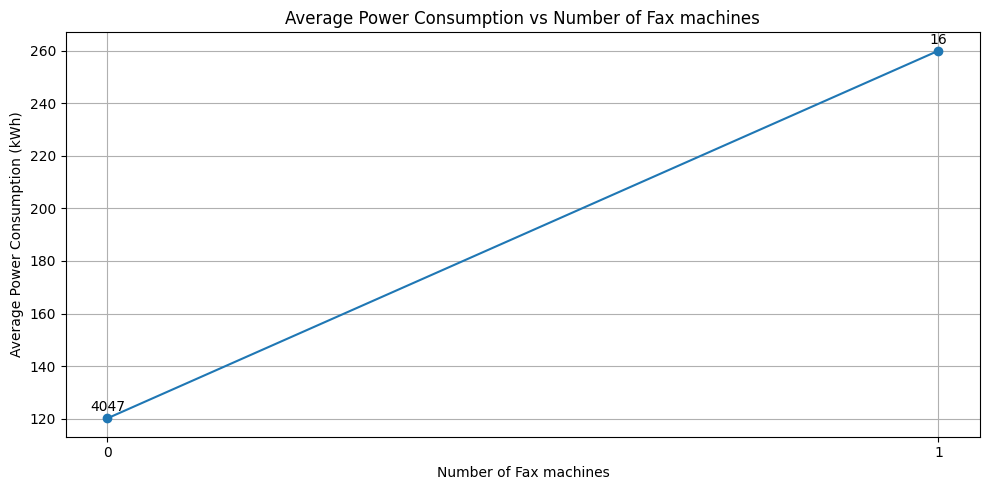

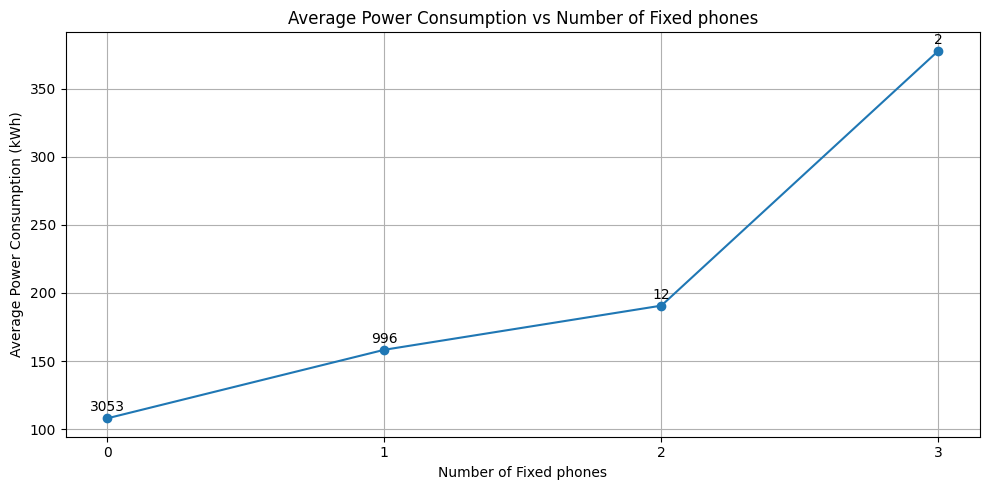

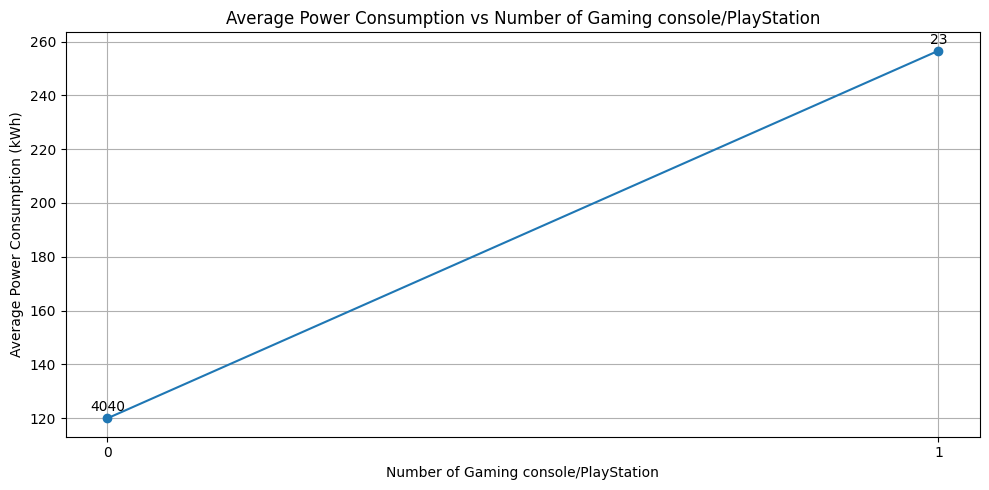

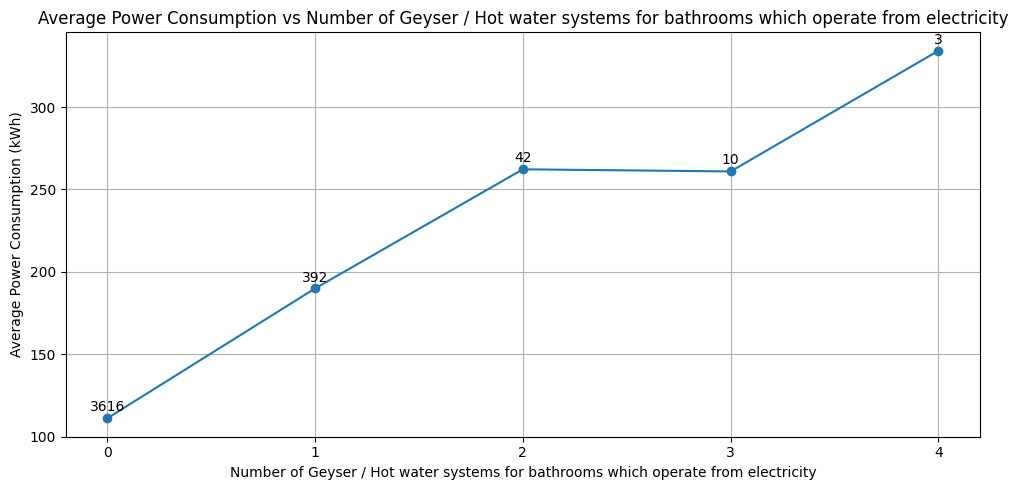

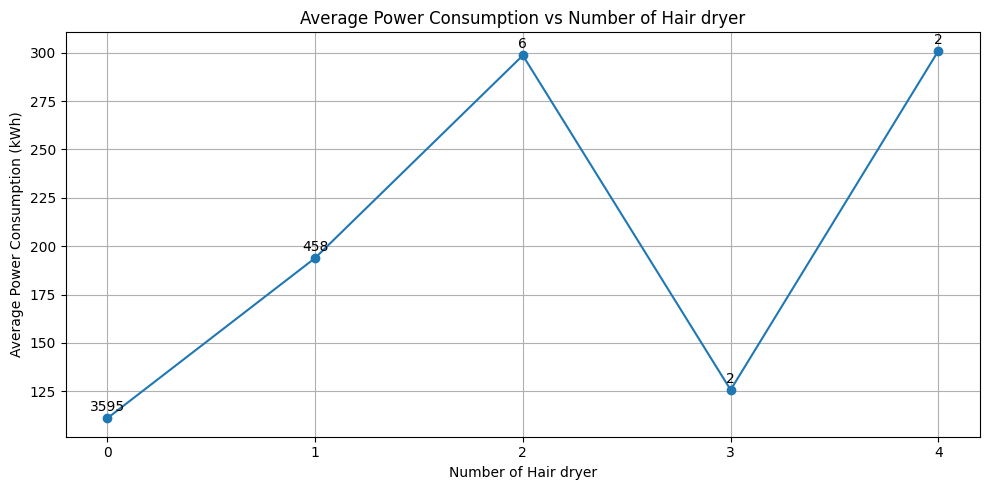

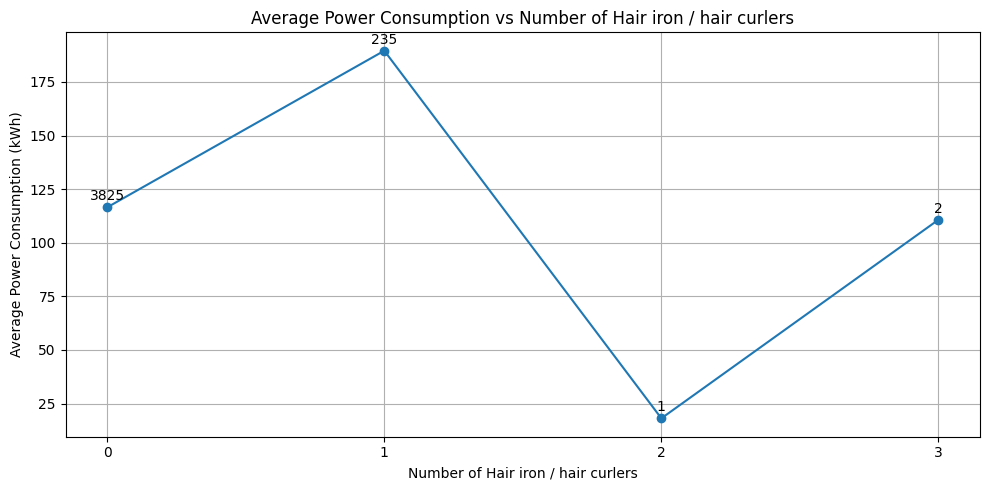

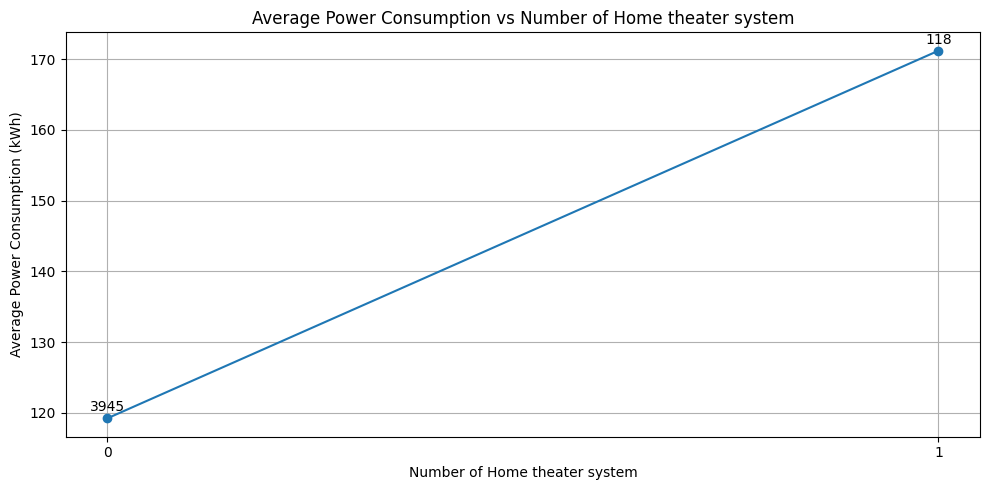

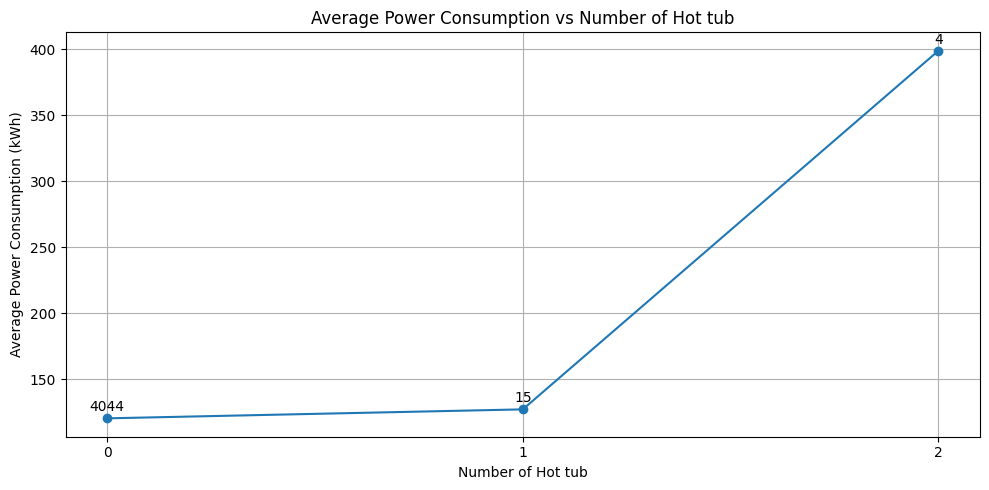

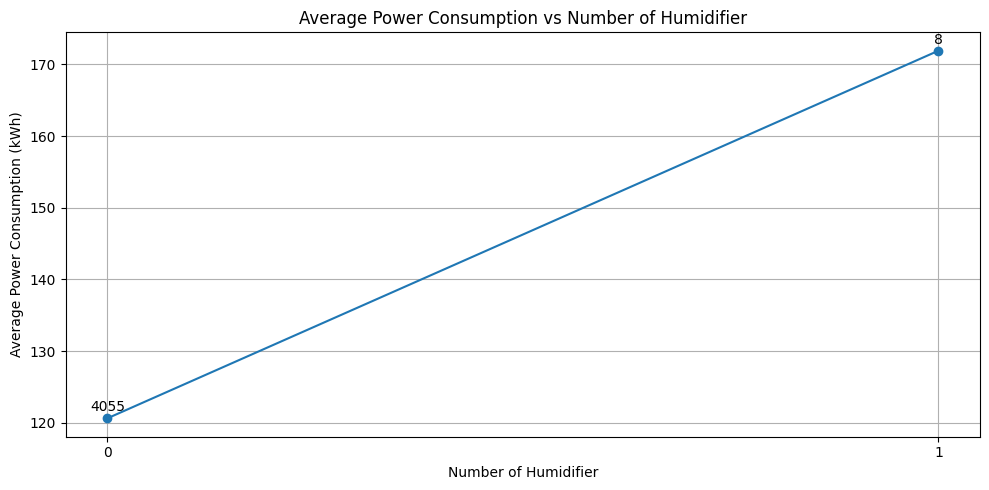

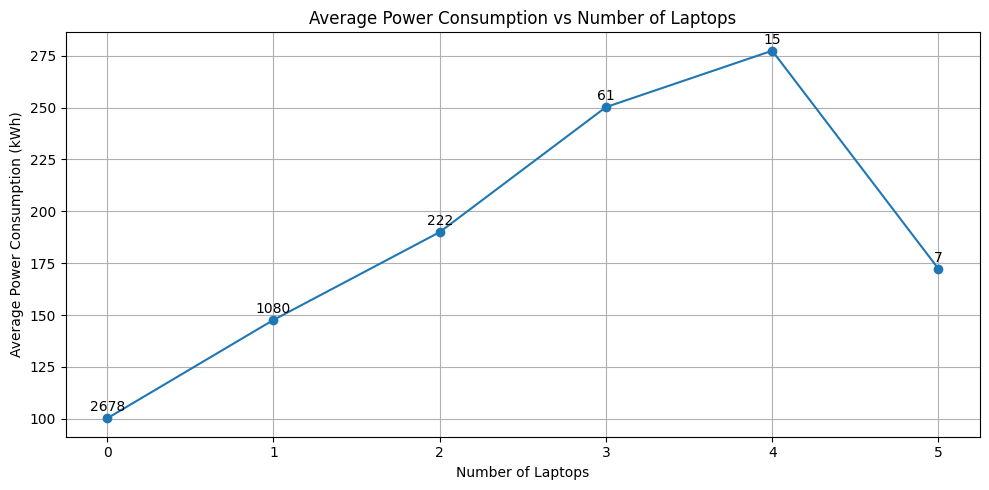

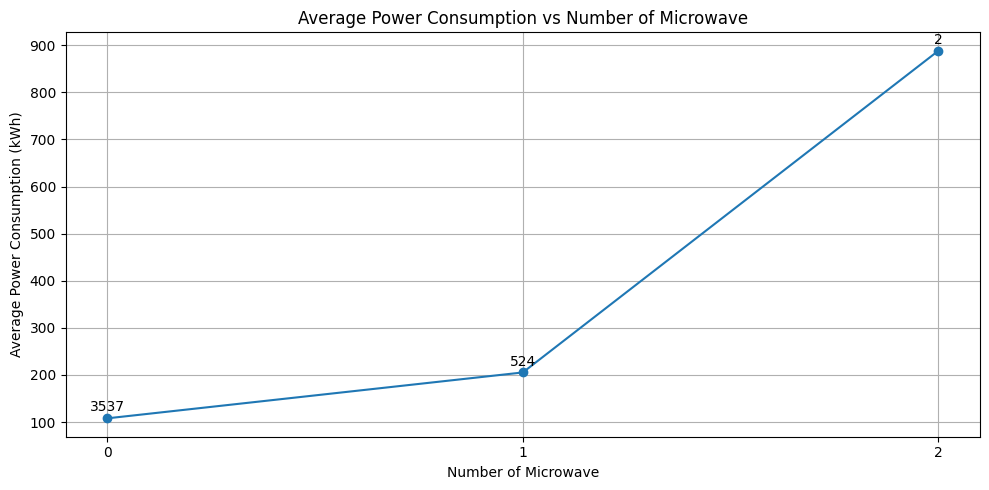

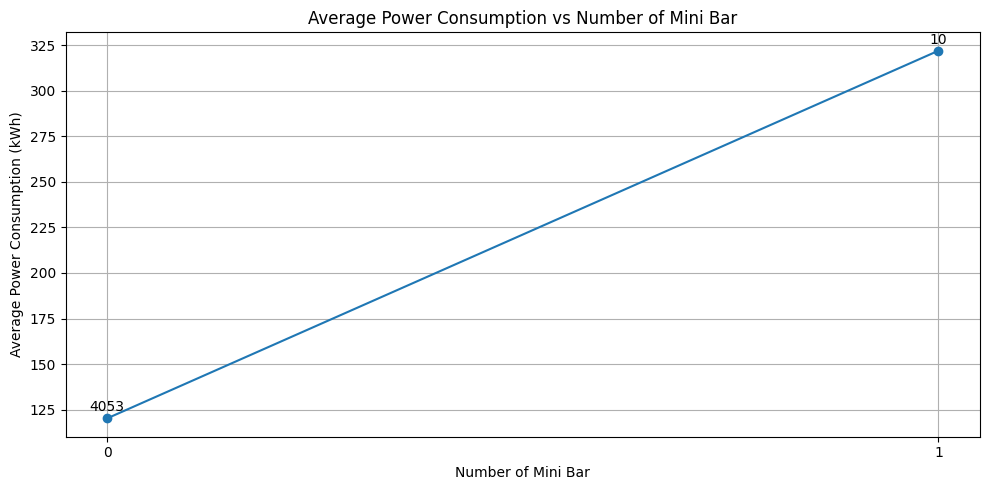

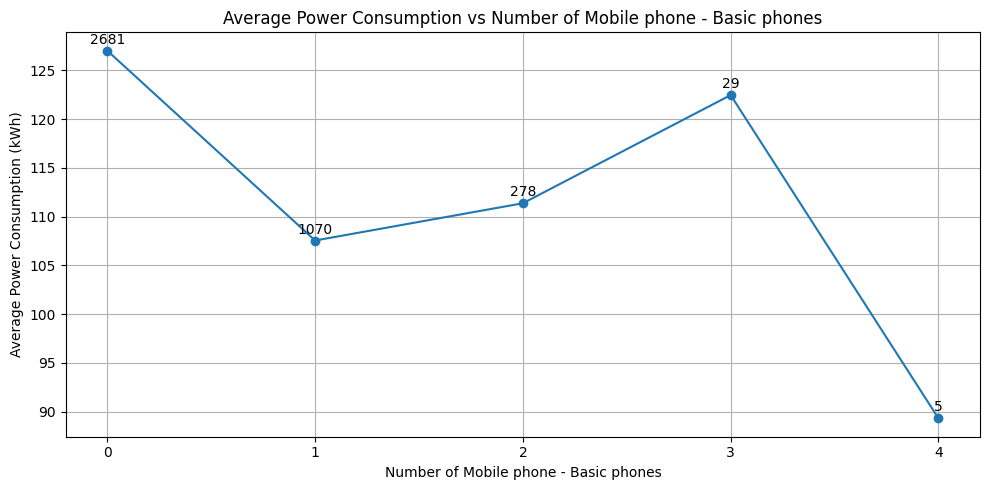

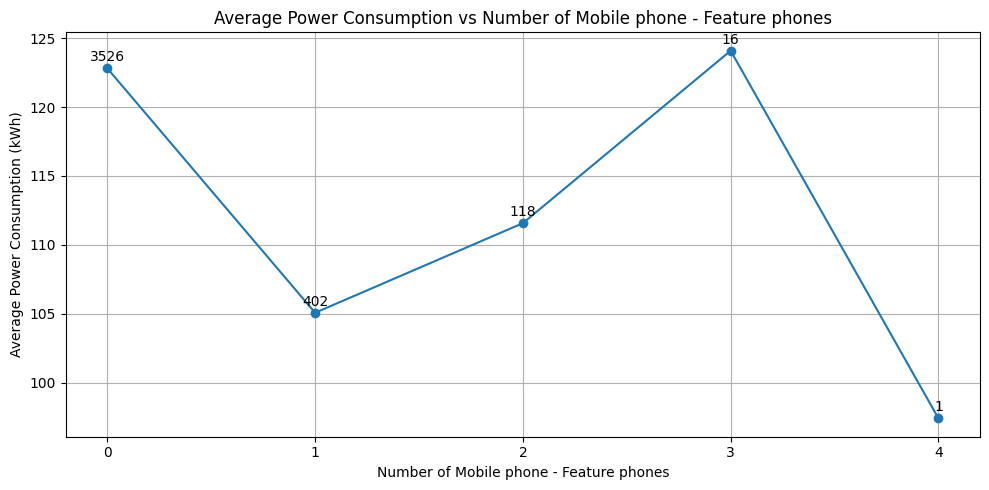

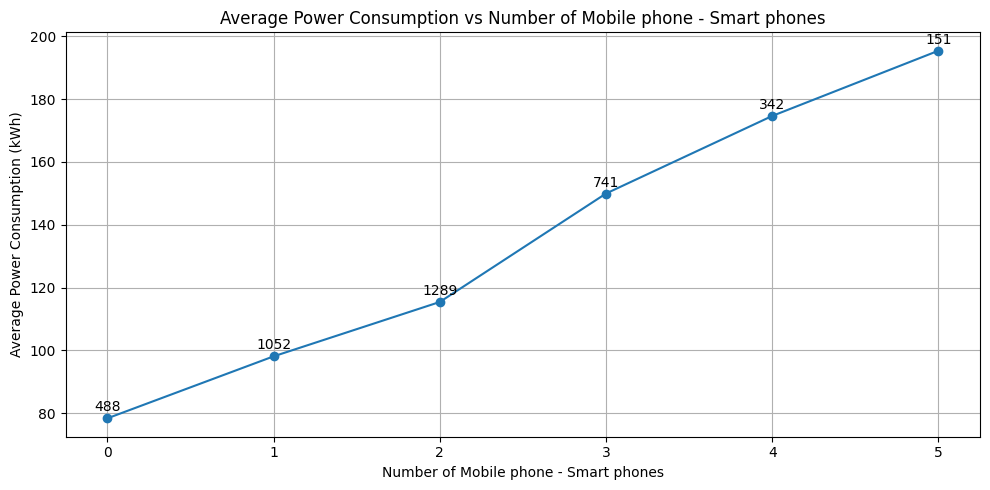

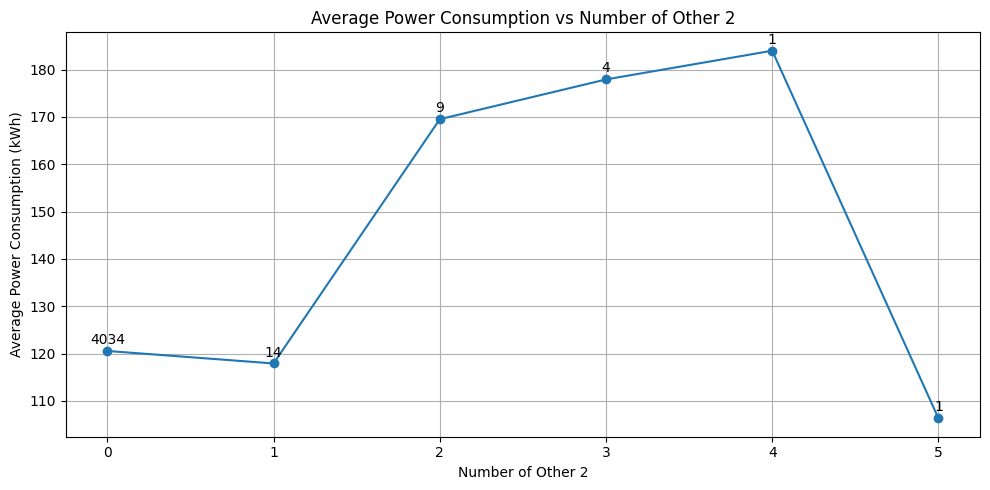

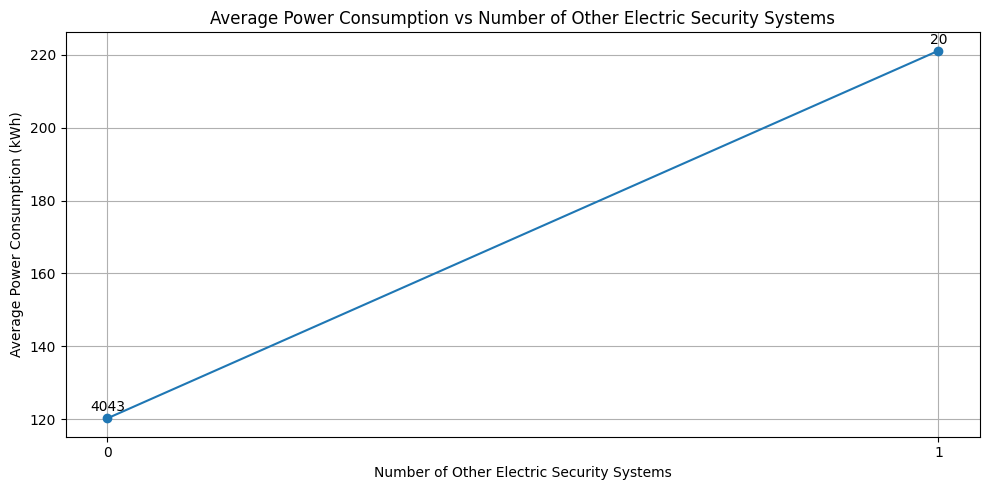

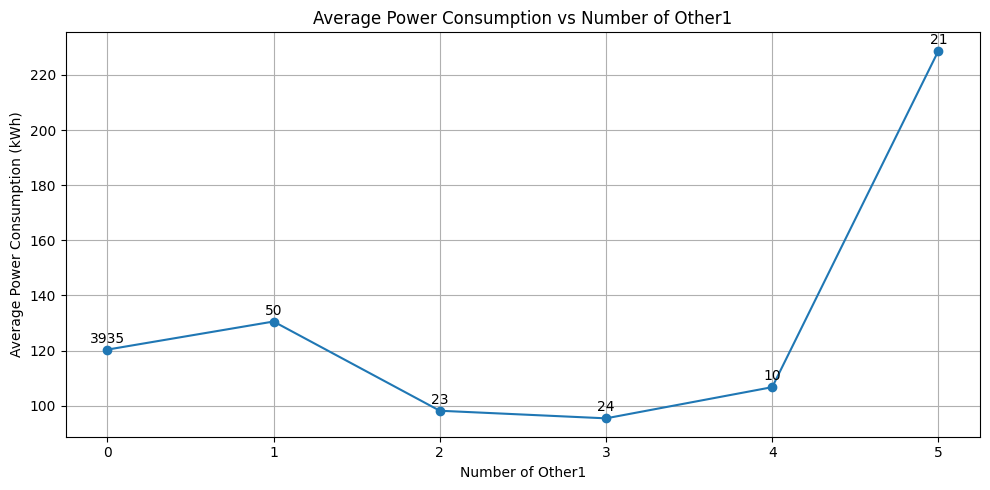

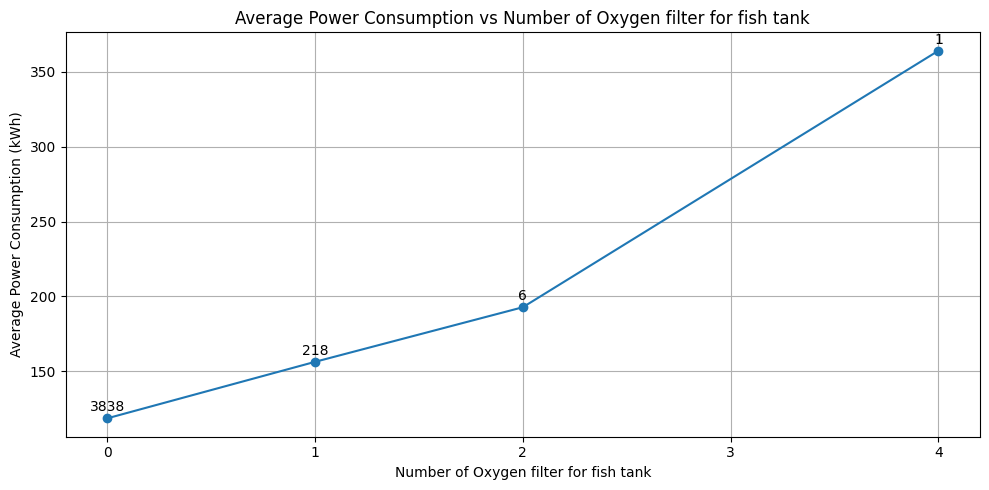

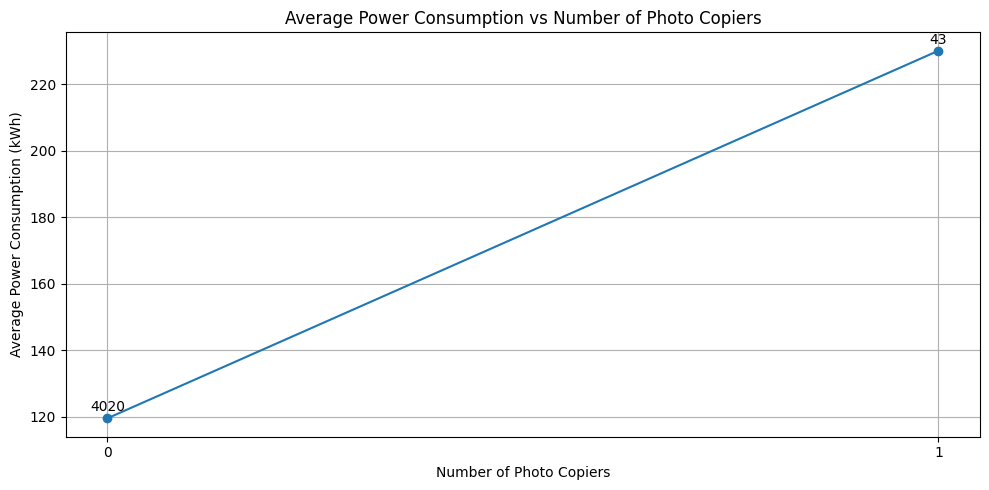

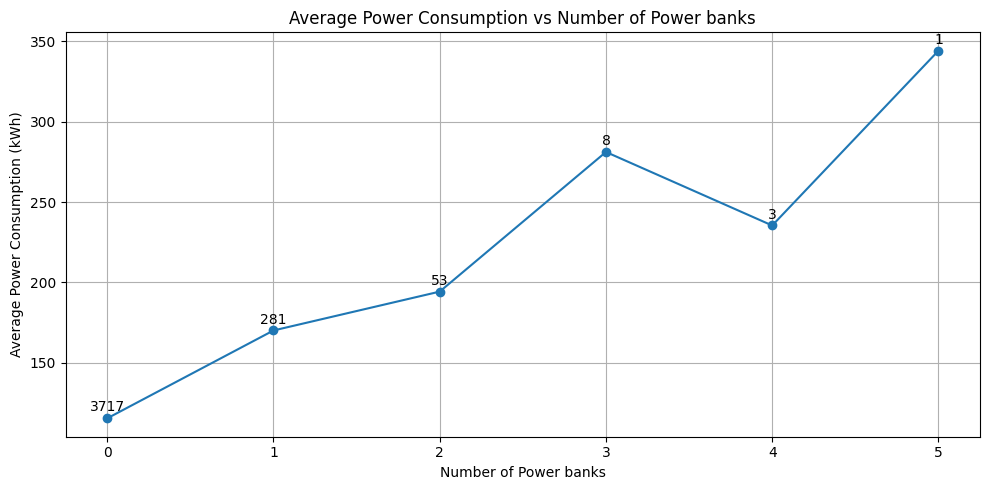

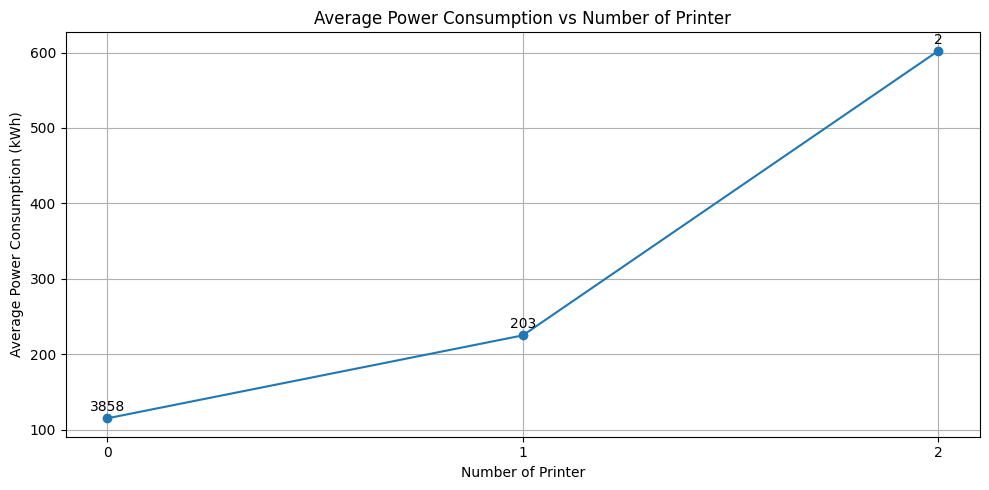

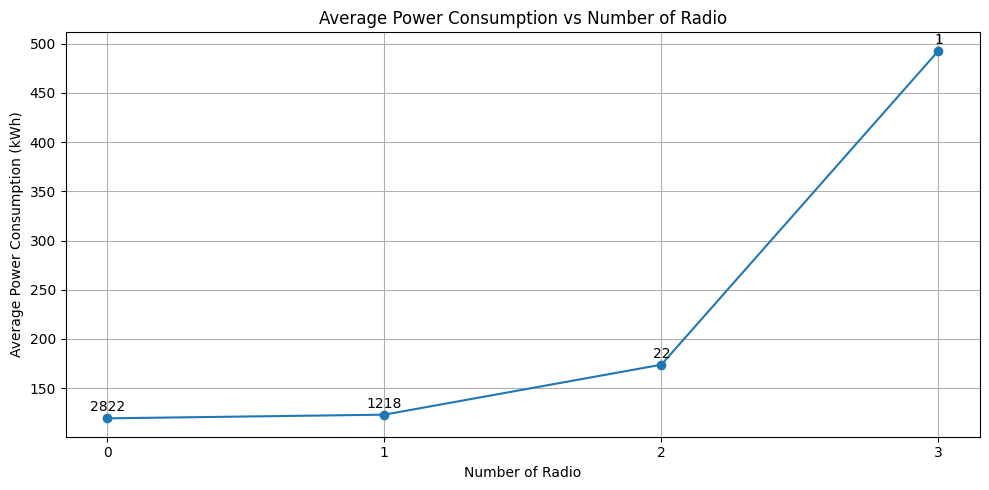

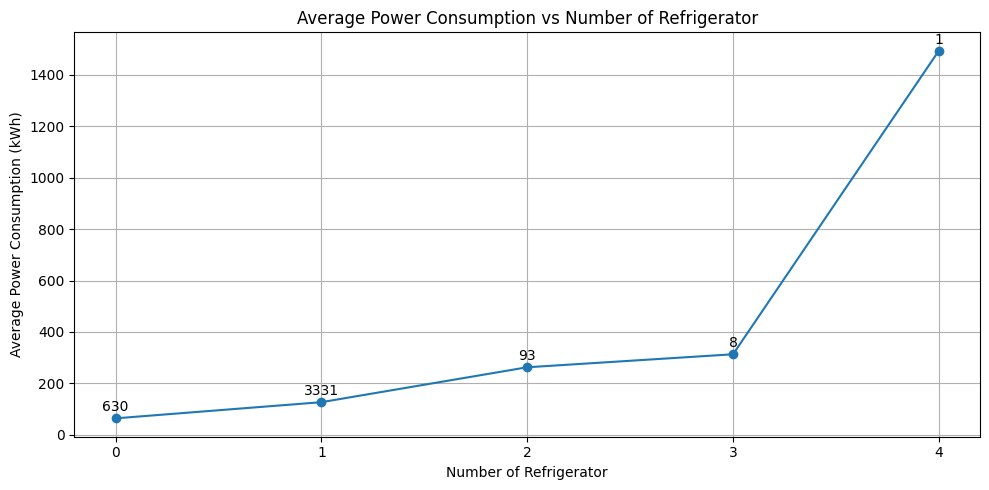

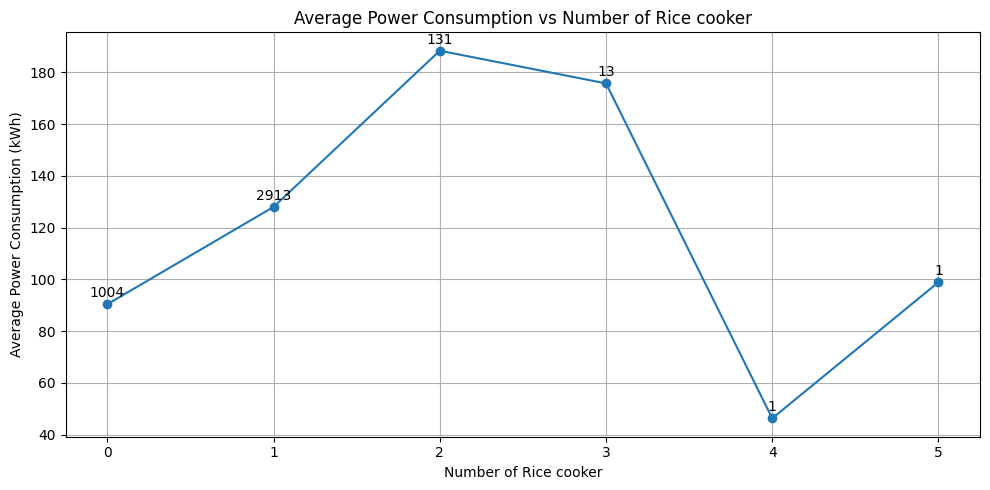

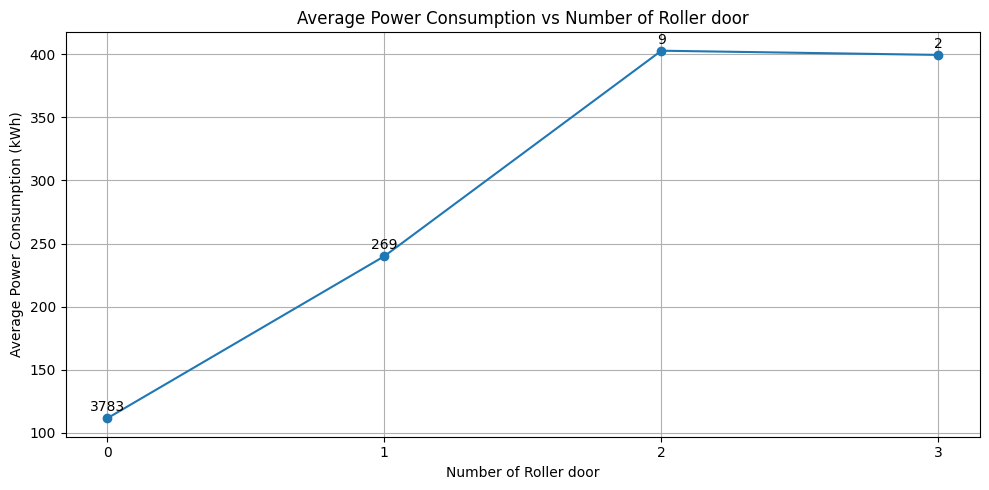

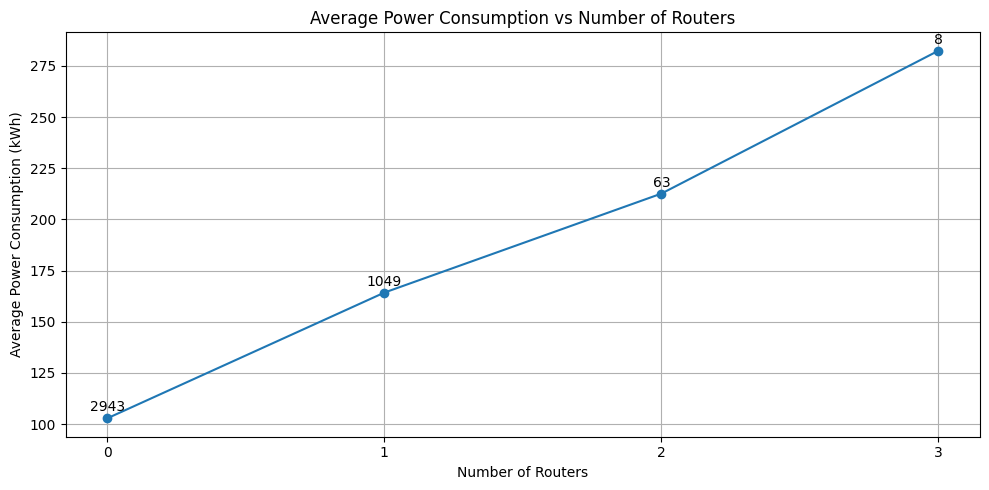

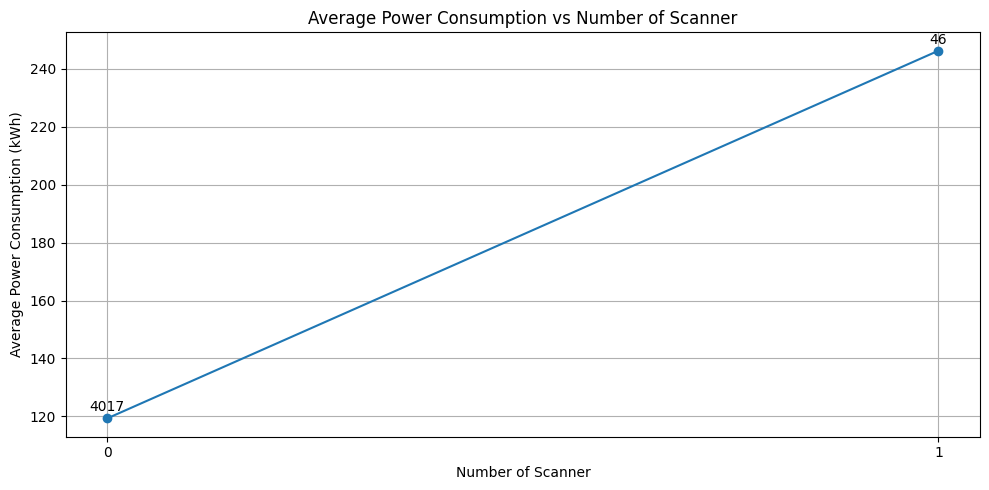

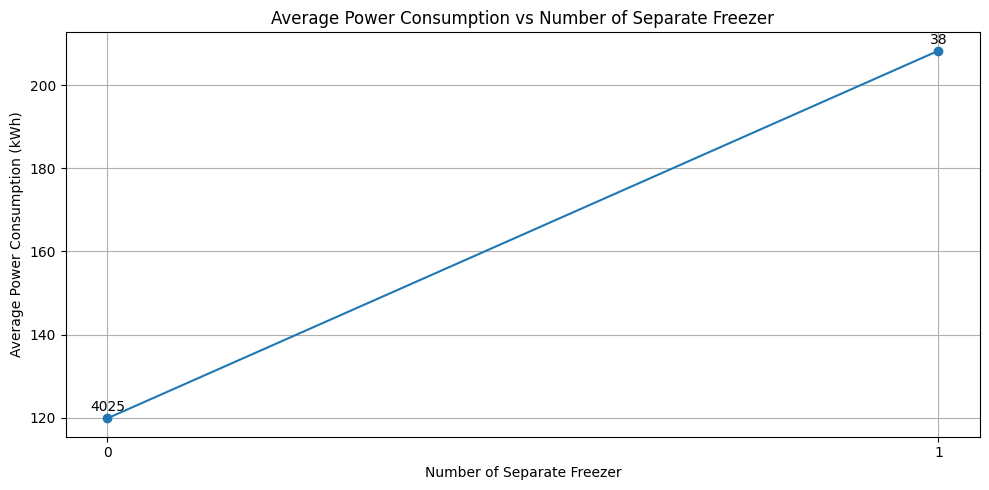

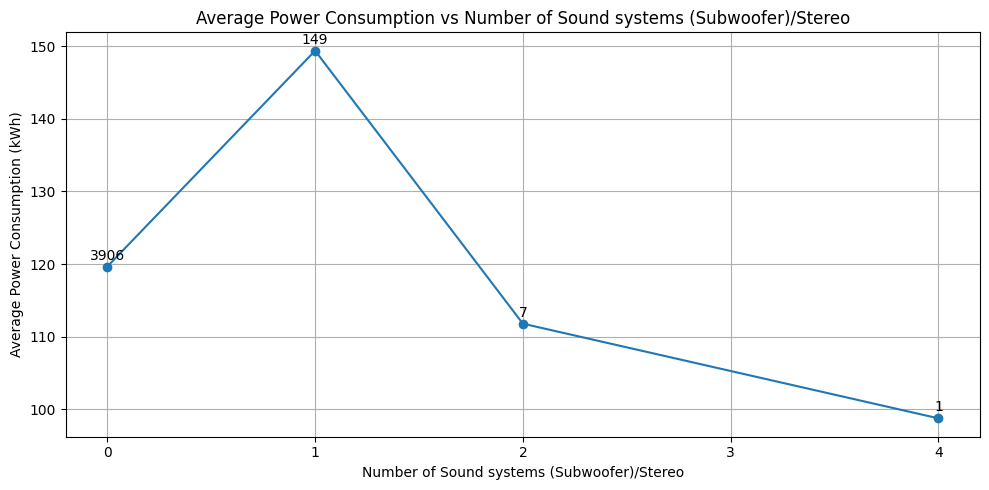

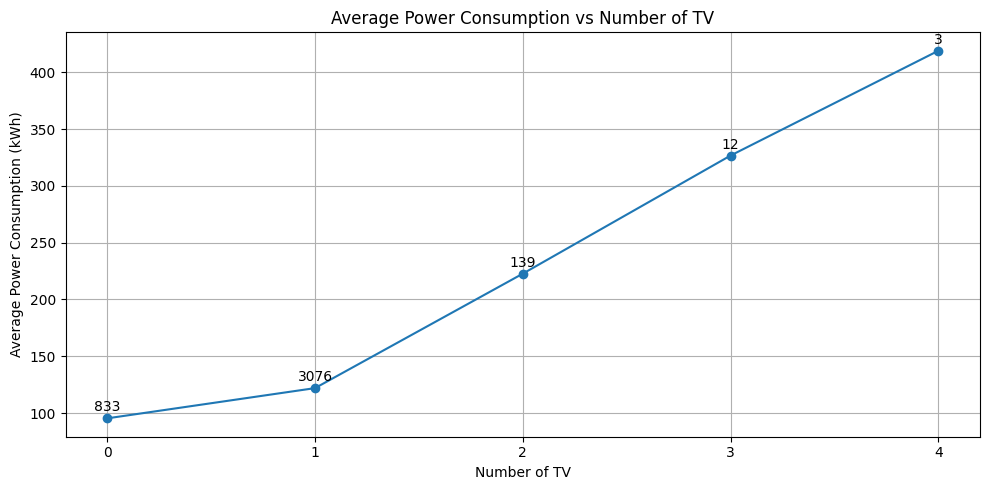

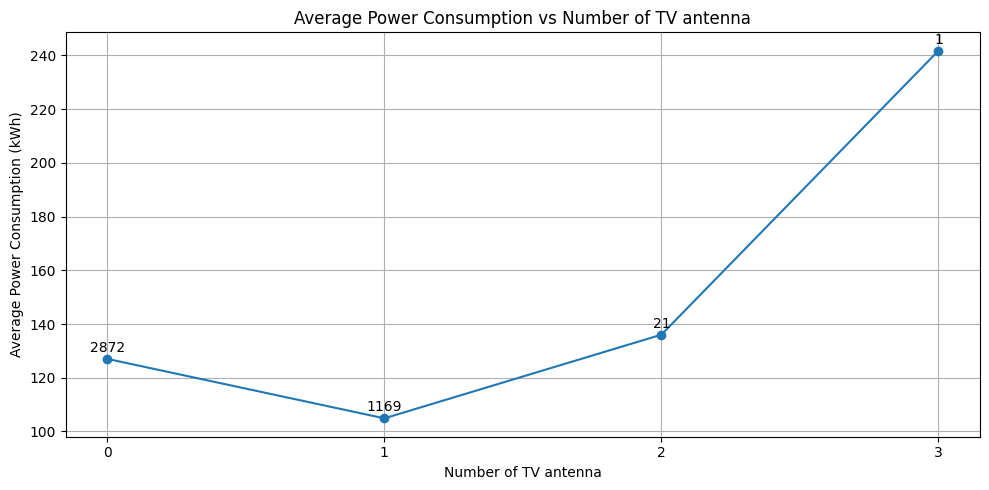

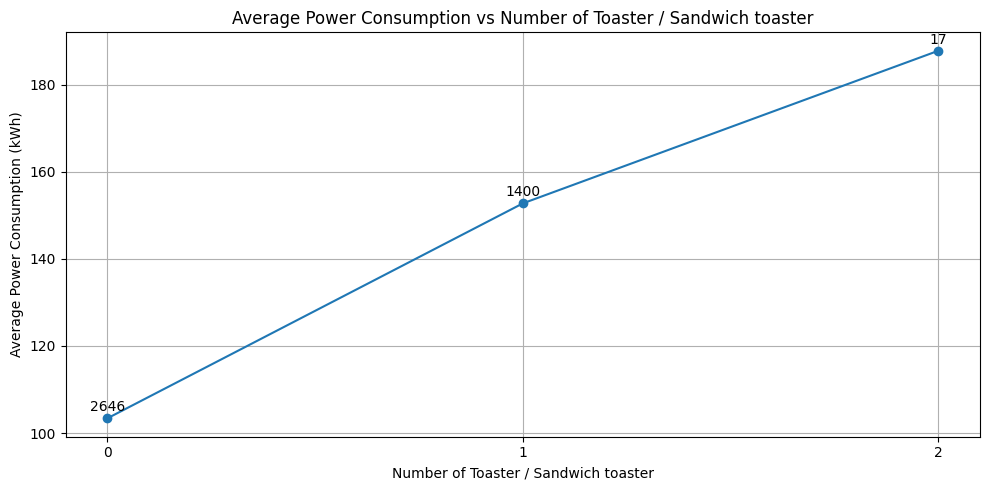

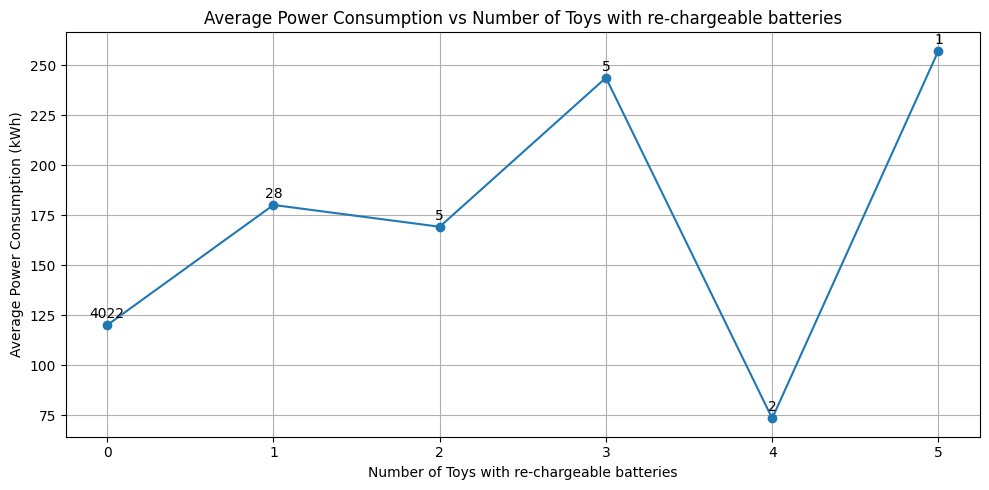

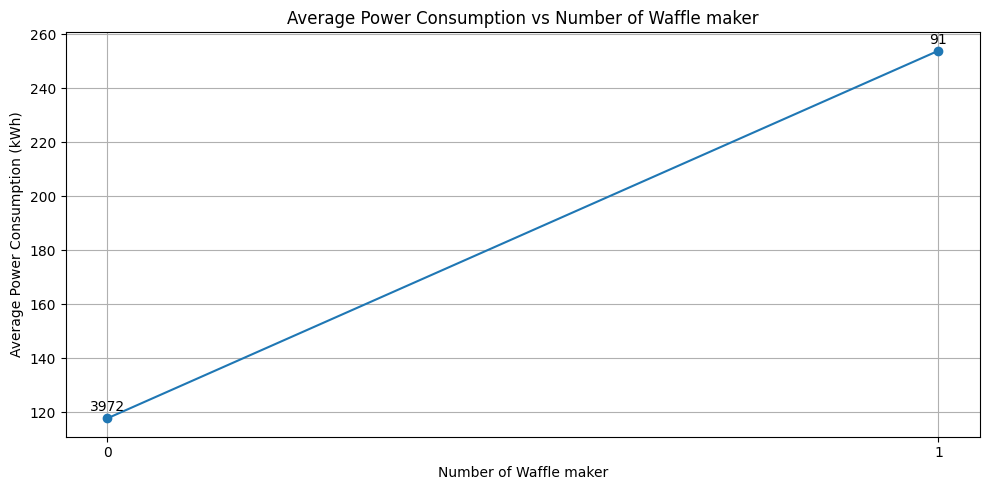

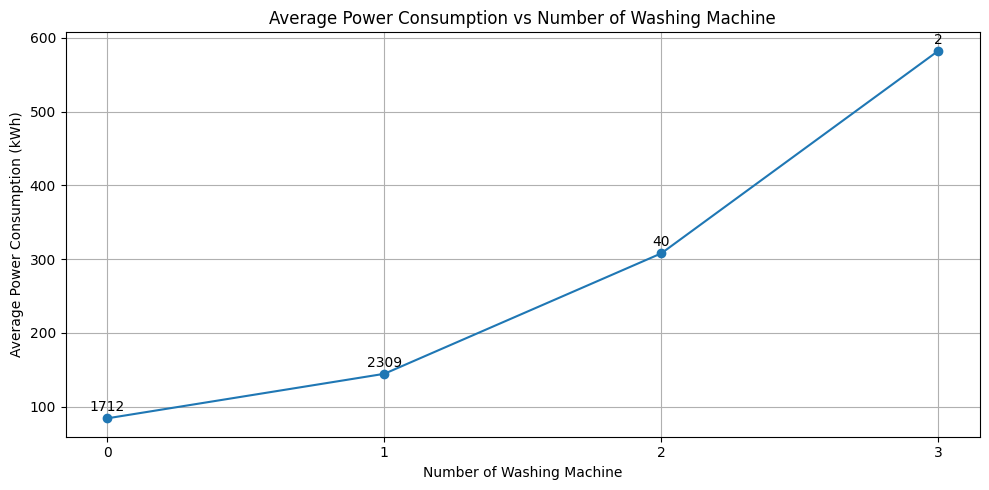

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('merged_non_smart_meter_data_with_appliance_counts.csv')

# Convert 'consumption' to numeric, forcing errors to NaN
data['consumption'] = pd.to_numeric(data['consumption'], errors='coerce')

# Get appliance columns (assuming the first three columns are household_ID, month, and consumption)
appliance_columns = data.columns[3:]

# Create a figure for each appliance
for appliance in appliance_columns:
    # Convert the appliance column to numeric, forcing errors to NaN
    data[appliance] = pd.to_numeric(data[appliance], errors='coerce')

    # Drop rows where either consumption or the appliance count is NaN
    valid_data = data.dropna(subset=['consumption', appliance])
    
    # Calculate average consumption and count of households
    avg_consumption = valid_data.groupby(appliance)['consumption'].mean().reset_index()
    household_count = valid_data.groupby(appliance)['household_ID'].nunique().reset_index(name='household_count')

    # Merge average consumption with household count
    avg_consumption = pd.merge(avg_consumption, household_count, on=appliance)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(avg_consumption[appliance], avg_consumption['consumption'], marker='o')
    plt.title(f'Average Power Consumption vs Number of {appliance}')
    plt.xlabel(f'Number of {appliance}')
    plt.ylabel('Average Power Consumption (kWh)')
    plt.grid()
    plt.xticks(range(int(avg_consumption[appliance].min()), int(avg_consumption[appliance].max()) + 1))

    # Annotate the number of households for each point
    for i in range(len(avg_consumption)):
        plt.annotate(f'{avg_consumption["household_count"].iloc[i]}', 
                     (avg_consumption[appliance].iloc[i], avg_consumption['consumption'].iloc[i]),
                     textcoords="offset points", 
                     xytext=(0, 5), 
                     ha='center')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [14]:
import pandas as pd

# Load the non-smart meter data
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Load the appliance data (assuming it contains columns for household_ID, appliance counts, and appliance hours)
appliance_data = pd.read_csv('w1_appliances.csv')  # Adjust the filename as necessary

# Merge the datasets on household_ID
combined_data = pd.merge(non_smart_meter_data, appliance_data, on='household_ID', how='left')

# Optionally, fill NaN values with 0 for appliance counts and hours
combined_data.fillna(0, inplace=True)

# Display the combined dataset
print(combined_data)

# Optionally, save the combined dataset to a new CSV file
combined_data.to_csv('combined_non_smart_meter_appliance_data.csv', index=False)

        household_ID       month consumption appliance_ID  \
0             ID0001  2022-10-31         116         O1_1   
1             ID0001  2022-10-31         116        O12_1   
2             ID0001  2022-10-31         116        O26_1   
3             ID0001  2022-10-31         116        O31_1   
4             ID0001  2022-10-31         116        O45_1   
...              ...         ...         ...          ...   
1340170       ID4063  2024-10-31         109        O45_3   
1340171       ID4063  2024-10-31         109        O45_4   
1340172       ID4063  2024-10-31         109        O45_5   
1340173       ID4063  2024-10-31         109        O47_1   
1340174       ID4063  2024-10-31         109        O47_2   

                                      appliance_type  \
0                                       Refrigerator   
1                                        Rice cooker   
2        Electric Iron including electric steam iron   
3                                          

In [19]:
import pandas as pd

# Load the non-smart meter data
non_smart_meter_data = pd.read_csv('non_smart_meter_data.csv')

# Load the appliance data
appliance_data = pd.read_csv('w1_appliances.csv')  # Replace with your actual appliance data file

# Calculate total appliance count per household
appliance_counts = appliance_data.groupby('household_ID').sum().reset_index()

# Calculate total appliance hours (assuming you have a 'usage_hours' column in appliance_data)
# If you don't have a usage_hours column, you can adjust this calculation accordingly
appliance_hours = appliance_data.groupby('household_ID')['no_of_hours_used_during_last_week'].sum().reset_index(name='total_appliance_hours')

# Merge total appliance counts and hours
total_appliance_data = pd.merge(appliance_counts, round(appliance_hours, 3), on='household_ID', how='left')

# Merge with non-smart meter data
combined_data = pd.merge(non_smart_meter_data, total_appliance_data, on='household_ID', how='left')

# Fill NaN values with 0 for households without appliances
combined_data.fillna(0, inplace=True)

combined_data.drop(columns=['appliance_ID', 'appliance_type', 'no_of_hours_used_during_last_week'], inplace=True)

# Display the resulting combined dataset
print(combined_data)

# Optionally, save the resulting dataset to a new CSV file
combined_data.to_csv('combined_non_smart_meter_data_with_appliance_counts_and_hours.csv', index=False)

       household_ID       month consumption  total_appliance_hours
0            ID0001  2022-10-31         116                   98.0
1            ID0001  2022-11-30         120                   98.0
2            ID0001  2022-12-31         129                   98.0
3            ID0001  2023-01-31         102                   98.0
4            ID0001  2023-02-28         115                   98.0
...             ...         ...         ...                    ...
101570       ID4063  2024-06-30         167                  217.0
101571       ID4063  2024-07-31         178                  217.0
101572       ID4063  2024-08-31         165                  217.0
101573       ID4063  2024-09-30         124                  217.0
101574       ID4063  2024-10-31         109                  217.0

[101575 rows x 4 columns]


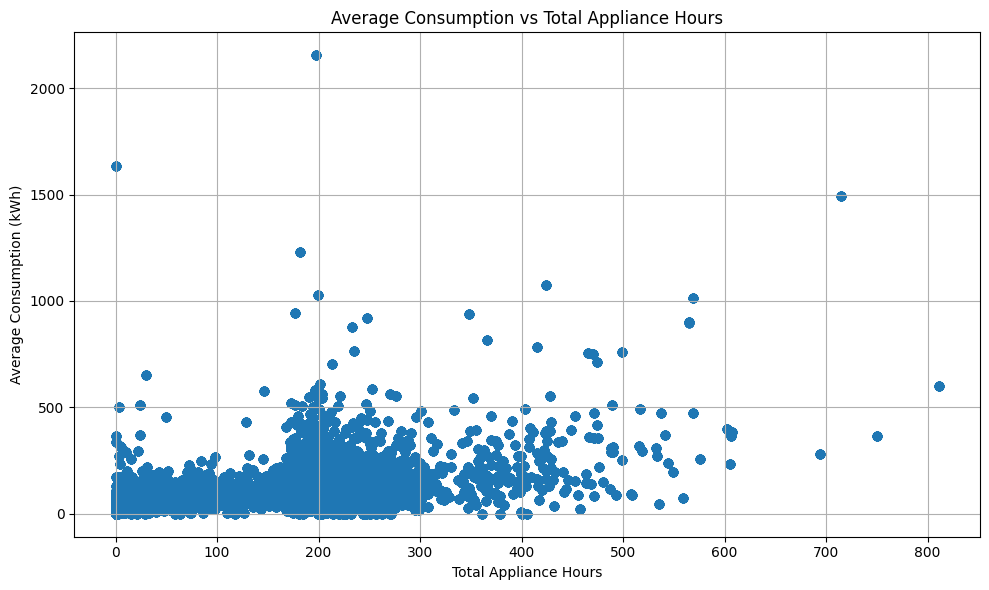

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
combined_data = pd.read_csv('combined_non_smart_meter_data_with_appliance_counts_and_hours.csv')

# Convert 'consumption' to numeric, forcing errors to NaN
combined_data['consumption'] = pd.to_numeric(combined_data['consumption'], errors='coerce')

# Convert 'total_appliance_hours' to numeric, forcing errors to NaN
combined_data['total_appliance_hours'] = pd.to_numeric(combined_data['total_appliance_hours'], errors='coerce')

# Drop rows with NaN values in 'consumption' or 'total_appliance_hours'
combined_data.dropna(subset=['consumption', 'total_appliance_hours'], inplace=True)

# Calculate average consumption per household
average_consumption = combined_data.groupby('household_ID')['consumption'].mean().reset_index(name='average_consumption')

# Merge average consumption with total appliance hours
merged_data = pd.merge(average_consumption, combined_data[['household_ID', 'total_appliance_hours']], on='household_ID', how='left')

# Drop rows with NaN values (if any)
merged_data.dropna(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['total_appliance_hours'], merged_data['average_consumption'], alpha=0.7)
plt.title('Average Consumption vs Total Appliance Hours')
plt.xlabel('Total Appliance Hours')
plt.ylabel('Average Consumption (kWh)')
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

Correlation between Average Consumption and Total Appliance Hours: 0.4268


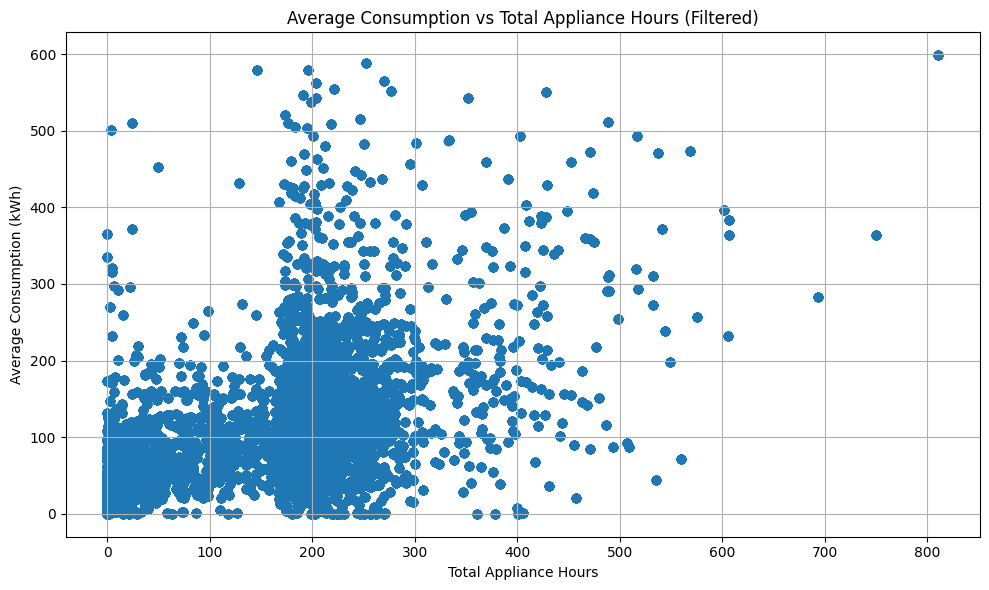

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
combined_data = pd.read_csv('combined_non_smart_meter_data_with_appliance_counts_and_hours.csv')

# Convert 'consumption' to numeric, forcing errors to NaN
combined_data['consumption'] = pd.to_numeric(combined_data['consumption'], errors='coerce')

# Convert 'total_appliance_hours' to numeric, forcing errors to NaN
combined_data['total_appliance_hours'] = pd.to_numeric(combined_data['total_appliance_hours'], errors='coerce')

# Drop rows with NaN values in 'consumption' or 'total_appliance_hours'
combined_data.dropna(subset=['consumption', 'total_appliance_hours'], inplace=True)

# Calculate average consumption per household
average_consumption = combined_data.groupby('household_ID')['consumption'].mean().reset_index(name='average_consumption')

# Merge average consumption with total appliance hours
merged_data = pd.merge(average_consumption, combined_data[['household_ID', 'total_appliance_hours']], on='household_ID', how='left')

# Drop rows with NaN values (if any)
merged_data.dropna(inplace=True)

# Remove rows where average consumption is greater than 1000
merged_data = merged_data[merged_data['average_consumption'] <= 600]

# Calculate the correlation between average consumption and total appliance hours
correlation = merged_data['average_consumption'].corr(merged_data['total_appliance_hours'])
print(f'Correlation between Average Consumption and Total Appliance Hours: {correlation:.4f}')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['total_appliance_hours'], merged_data['average_consumption'], alpha=0.7)
plt.title('Average Consumption vs Total Appliance Hours (Filtered)')
plt.xlabel('Total Appliance Hours')
plt.ylabel('Average Consumption (kWh)')
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()